# Are you mad enough to sell more clothes?

<img src="http://www.tabletmag.com/wp-content/files_mf/menken620.jpg"/>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

The data set is from a fairly high end clothing chain store in the North East.

You are a data analyst for this store. Your job is to write a report to the pointy-haired boss in which you show how you can increase the store's profit by being targeted about whom to send a catalog in the mail. Yes, you are in direct marketing. You are a quant amongst the "mad men". 

You need to explore and layout in simple terms, what the business needs to spend to increase its profit. In other words, you need a budget, and its your job to figure out how much as well.

We'll guide you through the process. There is much more you can explore, of-course, but this homework will walk you through an entire real world classification and analysis process with a finite amount of work and computer runtime.

You will

1. clean the data, and create some features, learning about how to standardize the data
2. write a classifier on this data, including cross validation, and learn to write a function to encapsulate this process
3. learn how to compare this classifier to baseline classifiers that you better beat using a profit metric rather than an accuracy metric
4. understand and use prediction thresholds
5. understand the use a ROC curve, especially in the situation where probability thresholds are not possible
6. learn to use a profit curve to pick a model, thus directly reflecting the metric of importance
7. learn a bit about feature selection, and why we need to pipeline feature selection and classification together, in an attempt to improve a classifier
8. balance a data set to improve the performance of a SVM classifier
9. implement a kernelized SVM to improve performance further.
10. make a final comparison of classifiers and make a presentation for your boss.

This homework is long because we are walking you through the entire process, start early! There are some parts of it that can be solved by understanding, copying, and slightly modifying code from the lab.  Feel free to do that. Pay attention to any difference in signature in the lab functions to the ones here.

The idea for this homework, and the attendant data set is taken from the book "Data Mining Methods and Models" by [Larose](http://www.dataminingconsultant.com/DMMM.htm). Henceforth we refer to this book as DMMM. There is an analysis of the data set there as well (ch7, the book is available online through our library), which you might be interested in. It is far more detailed than this homework, talking about log-normal data transformations, amongst other things.

(Image credit: www.tabletmag.com)

## The homework is due Thursday October 22nd at 11.59PM EST.

###Please run all cells before submitting

Get rid of any debugging cells you created, run all the cells you need to run, and then submit. Remember, your notebook is a "product" you are sharing with your fellow data scientists. It must communicate results, code, and text well.

#Table of Contents
* [Are you mad enough to sell more clothes?](#Are-you-mad-enough-to-sell-more-clothes?)
	* [The homework is due Thursday October 22nd at 11.59PM EST.](#The-homework-is-due-Thursday-October-22nd-at-11.59PM-EST.)
		* [Please run all cells before submitting](#Please-run-all-cells-before-submitting)
	* [1. Features and a simple classifier](#1.-Features-and-a-simple-classifier)
		* [Get, check, clean,  the data](#Get,-check,-clean,--the-data)
		* [Feature Engineering](#Feature-Engineering)
			* [Zero important indicators](#Zero-important-indicators)
			* [Combine some features](#Combine-some-features)
		* [Test and Training Sets, and Standardization](#Test-and-Training-Sets,-and-Standardization)
			* [1.1 Explain why this might be a good idea?](#1.1-Explain-why-this-might-be-a-good-idea?)
			* [1.2 Standardize the data](#1.2-Standardize-the-data)
		* [EDA for the data](#EDA-for-the-data)
			* [1.3 EDA for continuous features and indicators](#1.3-EDA-for-continuous-features-and-indicators)
		* [Writing code for a classifier](#Writing-code-for-a-classifier)
			* [1.4 Train a SVM on this data.](#1.4-Train-a-SVM-on-this-data.)
			* [1.5 Write a function to carry out grid-searched cross validation and use it on the SVM](#1.5-Write-a-function-to-carry-out-grid-searched-cross-validation-and-use-it-on-the-SVM)
	* [2. Estimate costs and benefits from assumptions and data](#2.-Estimate-costs-and-benefits-from-assumptions-and-data)
		* [Our data is highly asymmetric](#Our-data-is-highly-asymmetric)
			* [2.1 Compare the accuracy of the SVM to the no-customer-responds baseline](#2.1-Compare-the-accuracy-of-the-SVM-to-the-no-customer-responds-baseline)
		* [Costs and the Confusion Matrix](#Costs-and-the-Confusion-Matrix)
			* [Costs for True Positives, False Negatives, False Positives, and True Negatives](#Costs-for-True-Positives,-False-Negatives,-False-Positives,-and-True-Negatives)
			* [Cost  and Utility Matrix](#Cost--and-Utility-Matrix)
			* [Average Profit Per Person](#Average-Profit-Per-Person)
		* [Establishing Baseline Classifiers via profit](#Establishing-Baseline-Classifiers-via-profit)
			* [Dont Send to Anyone Baseline Classifier](#Dont-Send-to-Anyone-Baseline-Classifier)
			* [2.2 For this baseline classifier question, explain the value we got.](#2.2-For-this-baseline-classifier-question,-explain-the-value-we-got.)
			* [2.3 Send to Everyone Baseline Classifier](#2.3-Send-to-Everyone-Baseline-Classifier)
			* [2.4 Compare the SVM classifier with these baselines](#2.4-Compare-the-SVM-classifier-with-these-baselines)
			* [2.5 Implement logistic regression with Lasso based feature selection](#2.5-Implement-logistic-regression-with-Lasso-based-feature-selection)
		* [Prediction and Re-prediction](#Prediction-and-Re-prediction)
			* [Start with an arbitrary threshold t, and see how we fare at different thresholds for logistic regression](#Start-with-an-arbitrary-threshold-t,-and-see-how-we-fare-at-different-thresholds-for-logistic-regression)
	* [3. Comparing Models with ROC and Profit curves.](#3.-Comparing-Models-with-ROC-and-Profit-curves.)
		* [Thresholds, Comparing Models, and the ROC Curve](#Thresholds,-Comparing-Models,-and-the-ROC-Curve)
			* [3.1 Plot ROC curves](#3.1-Plot-ROC-curves)
			* [Tangent lines on a ROC curve](#Tangent-lines-on-a-ROC-curve)
			* [3.2 Based on the tangent line idea, which classifier seems like a better one? Why?](#3.2-Based-on-the-tangent-line-idea,-which-classifier-seems-like-a-better-one?-Why?)
		* [Compare classifiers using profit curves](#Compare-classifiers-using-profit-curves)
			* [3.3 Implement a function to calculate average profit per person](#3.3-Implement-a-function-to-calculate-average-profit-per-person)
			* [3.4 Plot profit curves](#3.4-Plot-profit-curves)
	* [4. Trying to improve the SVM: Feature Selection and Data Balancing](#4.-Trying-to-improve-the-SVM:-Feature-Selection-and-Data-Balancing)
		* [Feature Selection](#Feature-Selection)
			* [Non zero lasso features](#Non-zero-lasso-features)
			* [4.1 Feature importance using correlations](#4.1-Feature-importance-using-correlations)
			* [Why Feature Select?](#Why-Feature-Select?)
		* [Create a pipeline to feature-select, standardize and train!](#Create-a-pipeline-to-feature-select,-standardize-and-train!)
			* [Let us run the pipelined classifier](#Let-us-run-the-pipelined-classifier)
		* [Balancing train set to test set for training.](#Balancing-train-set-to-test-set-for-training.)
			* [4.2 Train a linear SVM on this balanced set](#4.2-Train-a-linear-SVM-on-this-balanced-set)
		* [Running a kernelized SVM](#Running-a-kernelized-SVM)
			* [4.3 Implement a RBF based pipelined (feature-selected) classifier on the balanced set.](#4.3-Implement-a-RBF-based-pipelined-%28feature-selected%29-classifier-on-the-balanced-set.)
			* [4.4 Refit the best model on the entire balanced  data set, rather than the subsampling](#4.4-Refit-the-best-model-on-the-entire-balanced--data-set,-rather-than-the-subsampling)
	* [5. Final steps: Making decisions, and writing to your boss](#5.-Final-steps:-Making-decisions,-and-writing-to-your-boss)
		* [Choosing a classifier and making a profit](#Choosing-a-classifier-and-making-a-profit)
			* [5.1 Compare multiple classifiers to make a decision on which one to use.](#5.1-Compare-multiple-classifiers-to-make-a-decision-on-which-one-to-use.)
			* [5.2 Choose the best performing classifier and use it to write a 5-6 slide presentation for your boss](#5.2-Choose-the-best-performing-classifier-and-use-it-to-write-a-5-6-slide-presentation-for-your-boss)


(This documentation of the fields is taken verbatim from DMMM).

The clothing-store data set contains information about 28,799 customers in the following 51 fields:

- Customer ID: unique, encrypted customer identification `HHKEY`
- Zip code `ZIP_CODE`
- Number of purchase visits `FRE`
- Total net sales `MON`
- Average amount spent per visit `AVRG`
- Amount spent at each of four different franchises (four variables) `AMSPEND`, `PSSPEND`, `CCSPEND`, `AXSPEND`
- Amount spent in the past month, the past three months, and the past six months `OMONSPEND`, `TMONSPEND`, `SMONSPEND`
- Amount spent the same period last year `PREVPD`
- Gross margin percentage `GMP`
- Number of marketing promotions on file `PROMOS`
- Number of days the customer has been on file `DAYS`
- Number of days between purchases `FREDAYS`
- Markdown percentage on customer purchases `MARKDOWN`
- Number of different product classes purchased `CLASSES`
- Number of coupons used by the customer `COUPONS`
- Total number of individual items purchased by the customer `STYLES`
- Number of stores the customer shopped at `STORES`
- Number of promotions mailed in the past year `MAILED`
- Number of promotions responded to in the past year `RESPONDED`
- Promotion response rate for the past year `RESPONSERATE`
- Product uniformity (low score = diverse spending patterns) `HI`
- Lifetime average time between visits `LTFREDAYS`
- Microvision lifestyle cluster type `CLUSTYPE`
- Percent of returns `PERCRET`
- Flag: credit card user `CC_CARD`
- Flag: valid phone number on file `VALPHON`
- Flag: Web shopper `WEB`
- 15 variables providing the percentages spent by the customer on specific classes of clothing, including sweaters, knit tops, knit dresses, blouses, jackets, career pants, casual pants, shirts, dresses, suits, outerwear, jewelry, fashion, legwear, and the collectibles line; (`P*`, `PJACKETS` for example) also a variable showing the brand of choice (encrypted)
- **Target variable**: response to promotion `RESP`...this is our **response** or **y**.


These data are based on a direct mail marketing campaign conducted last year. We want to use this information to develop classification models for this year’s marketing campaign.

## 1. Features and a simple classifier

### Get, check, clean,  the data

In [2]:
df=pd.read_csv("./data/Clothing_Store.csv")
df.head()

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,STORELOY,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,9955600066402,1001,208,2,368.46,0,184.23,11,0.18,0.00,0.00,0.30,0.0,0.25,0.00,0.19,0.00,0,0,0.000000,0.02,0.03,0.29,0,0,368.46,0,0.00,0.00,0.00,0.00,0.60,17,666,333.00,0.08,9,1,11,1,7,N,0,5,0,0.00,31.81,111.00,10,0.00,0
1,9955600073501,1028,6,4,258.00,1,64.50,11,0.26,0.16,0.00,0.00,0.0,0.18,0.14,0.00,0.18,0,0,0.000000,0.00,0.02,0.37,0,0,258.00,0,138.00,55.99,258.00,0.00,0.54,14,696,174.00,0.33,6,0,14,1,7,Y,0,4,2,50.00,32.72,43.50,10,0.03,1
2,9955600076313,1056,327,2,77.00,0,38.50,11,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0.000000,0.00,0.00,0.00,0,0,77.00,0,0.00,0.00,0.00,39.00,0.62,10,343,171.50,0.11,1,0,2,1,7,N,0,4,0,0.00,100.00,68.60,16,0.00,0
3,9955600078045,1118,66,8,846.06,1,105.75,11,0.38,0.00,0.05,0.06,0.2,0.17,0.00,0.05,0.00,0,0,0.005307,0.03,0.01,0.00,0,0,846.06,0,104.94,0.00,373.87,166.25,0.43,24,701,87.62,0.29,15,3,35,1,7,Y,0,9,6,66.67,23.27,26.96,10,0.00,0
4,9955600078517,1107,49,1,87.44,0,87.44,11,0.20,0.20,0.00,0.00,0.0,0.00,0.41,0.00,0.00,0,0,0.170000,0.00,0.00,0.00,0,0,87.44,0,87.44,0.00,87.44,0.00,0.22,0,49,49.00,0.42,4,0,8,1,7,Y,0,0,0,0.00,28.52,24.50,20,0.00,0


In [3]:
df.shape

(21740, 51)

We'll delete some columns we dont intend to use, and which I couldnt quite figure out what they were from the original data set and documentation.

In [4]:
del df['CLUSTYPE']
del df['HHKEY'], df['ZIP_CODE'], df['REC'], df['PC_CALC20'] 
del df['STORELOY']

In [5]:
df.columns

Index([u'FRE', u'MON', u'CC_CARD', u'AVRG', u'PSWEATERS', u'PKNIT_TOPS', u'PKNIT_DRES', u'PBLOUSES', u'PJACKETS', u'PCAR_PNTS', u'PCAS_PNTS', u'PSHIRTS', u'PDRESSES', u'PSUITS', u'POUTERWEAR', u'PJEWELRY', u'PFASHION', u'PLEGWEAR', u'PCOLLSPND', u'AMSPEND', u'PSSPEND', u'CCSPEND', u'AXSPEND', u'TMONSPEND', u'OMONSPEND', u'SMONSPEND', u'PREVPD', u'GMP', u'PROMOS', u'DAYS', u'FREDAYS', u'MARKDOWN', u'CLASSES', u'COUPONS', u'STYLES', u'STORES', u'VALPHON', u'WEB', u'MAILED', u'RESPONDED',
       u'RESPONSERATE', u'HI', u'LTFREDAY', u'PERCRET', u'RESP'],
      dtype='object')

Make a copy of the dataframe to make transformations to.

In [6]:
dftouse=df.copy()

### Feature Engineering

Feature Engineering is one of the most important "human inputs" that go into machine learning. Machines can run algorithms, but if you feed in garbage, you will get out garbage. The features that are important, or the feature combinations that might be useful in a problem, are inputs that humans can use to help the machine along. Domain knowledge is particularly useful. 

We first list the columns that are percentages:

In [7]:
PERCENT_VARS=[ u'PSWEATERS', u'PKNIT_TOPS', u'PKNIT_DRES', u'PBLOUSES', u'PJACKETS', u'PCAR_PNTS', u'PCAS_PNTS', u'PSHIRTS', 
              u'PDRESSES', u'PSUITS', u'POUTERWEAR', u'PJEWELRY', u'PFASHION', u'PLEGWEAR', u'PCOLLSPND']
len(PERCENT_VARS)

15

Next, we look for columns where the existence or lack thereof of a zero may be important in a classifier. We used our intuition to make these choices, believing that there is additional information encoded in say, `PERCRET`: if you never returned anything you might not be a budget shopper and thus someone who might have the money to shop quite a bit...

In [8]:
ZERO_IMPORTANT_VARS = [u'PREVPD', u'AMSPEND', u'PSSPEND', u'CCSPEND', u'AXSPEND', u'RESPONDED', u'PERCRET']

We also list the columns with floating-point or integer variables that are amenable to standardization

In [9]:
STANDARDIZABLE = PERCENT_VARS + ZERO_IMPORTANT_VARS + [u'FRE', u'MON',  u'AVRG', u'GMP', u'PROMOS', u'DAYS', u'FREDAYS', u'MARKDOWN', u'CLASSES', u'COUPONS', u'STYLES',  u'MAILED',  u'RESPONSERATE', u'HI', u'LTFREDAY']

Now, an **indicator variable** is one which takes a few, usually 2 values (1/0, True/False) to code the existence or lack thereof of a property or feature. We look for existing indicators:

In [10]:
for v in df.columns:
    l=df[v].unique()
    if len(l) <= 10:
        print (v, l)

('CC_CARD', array([0, 1]))
('VALPHON', array(['N', 'Y'], dtype=object))
('WEB', array([0, 1]))
('RESP', array([0, 1]))


#### Zero important indicators

We encode VALPHON, PERCENT_VARS, and ZERO_IMPORTANT_VARS as indicators. By doing this we are saying: the fact that these features are non-zero carries additional importance as compared to their values.

We maintain a global list INDICATORS in which the names of these columns are stored, prepending an `i_` to each of these variables to denote that they are indicators.

Note that all changes are now being made to the `dftouse` dataframe.

In [11]:
# rename some indicators and make them all 1-0
dftouse['i_VALPHON']=(df.VALPHON=='Y')*1
del dftouse['VALPHON']
dftouse.rename(columns={'WEB':'i_WEB', 'CC_CARD':'i_CC_CARD'}, inplace=True)
INDICATORS=['i_VALPHON','i_WEB','i_CC_CARD']

We then take the `ZERO_IMPORTANT_VARS`, the ones we thought where presence or absence was important, and create indicators from them

In [12]:
for p in ZERO_IMPORTANT_VARS:
    dftouse['i_'+p]=(df[p] > 0.0)*1
    INDICATORS.append('i_'+p)

And then we create indicators for each of the percent variables `PERCENT_VARS` (following Larose's ch7), in the hope that the presence or absence of buying a particular clothing style such as blouses makes a difference...

In [13]:
for p in PERCENT_VARS:
    dftouse['i_'+p]=(df[p] > 0.0)*1
    INDICATORS.append('i_'+p)

#### Combine some features 

We do this to communicate clearly information about recentness and savings

We add two more indicators corresponding to recent spending, and recent use of a savings mechanism.

In [14]:
#create recent usage (1 month and 3 month),  sale-shopper (markdown+coupon)
dftouse["i_RECENT"]=1*((df.OMONSPEND > 0) | (df.TMONSPEND > 0))
dftouse["i_SAVER"]=1*((df.MARKDOWN > 0) | (df.COUPONS > 0))
INDICATORS.append("i_RECENT")
INDICATORS.append("i_SAVER")

Lets see what we now have...

In [15]:
dftouse.head()

,FRE,MON,i_CC_CARD,AVRG,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,i_WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,PERCRET,RESP,i_VALPHON,i_PREVPD,i_AMSPEND,i_PSSPEND,i_CCSPEND,i_AXSPEND,i_RESPONDED,i_PERCRET,i_PSWEATERS,i_PKNIT_TOPS,i_PKNIT_DRES,i_PBLOUSES,i_PJACKETS,i_PCAR_PNTS,i_PCAS_PNTS,i_PSHIRTS,i_PDRESSES,i_PSUITS,i_POUTERWEAR,i_PJEWELRY,i_PFASHION,i_PLEGWEAR,i_PCOLLSPND,i_RECENT,i_SAVER
0,2,368.46,0,184.23,0.18,0.00,0.00,0.30,0.0,0.25,0.00,0.19,0.00,0,0,0.000000,0.02,0.03,0.29,0,0,368.46,0,0.00,0.00,0.00,0.00,0.60,17,666,333.00,0.08,9,1,11,1,0,5,0,0.00,31.81,111.00,0.00,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,1,0,1
1,4,258.00,1,64.50,0.26,0.16,0.00,0.00,0.0,0.18,0.14,0.00,0.18,0,0,0.000000,0.00,0.02,0.37,0,0,258.00,0,138.00,55.99,258.00,0.00,0.54,14,696,174.00,0.33,6,0,14,1,0,4,2,50.00,32.72,43.50,0.03,1,1,0,0,0,1,0,1,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1
2,2,77.00,0,38.50,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0.000000,0.00,0.00,0.00,0,0,77.00,0,0.00,0.00,0.00,39.00,0.62,10,343,171.50,0.11,1,0,2,1,0,4,0,0.00,100.00,68.60,0.00,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,8,846.06,1,105.75,0.38,0.00,0.05,0.06,0.2,0.17,0.00,0.05,0.00,0,0,0.005307,0.03,0.01,0.00,0,0,846.06,0,104.94,0.00,373.87,166.25,0.43,24,701,87.62,0.29,15,3,35,1,0,9,6,66.67,23.27,26.96,0.00,0,1,1,0,0,1,0,1,0,1,0,1,1,1,1,0,1,0,0,0,1,1,1,0,1,1
4,1,87.44,0,87.44,0.20,0.20,0.00,0.00,0.0,0.00,0.41,0.00,0.00,0,0,0.170000,0.00,0.00,0.00,0,0,87.44,0,87.44,0.00,87.44,0.00,0.22,0,49,49.00,0.42,4,0,8,1,0,0,0,0.00,28.52,24.50,0.00,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1


In [16]:
dftouse.shape

(21740, 69)

Clearly we've currently expanded the number of features we have in an attempt to pit in information in the form of indicators which communicate additional distinguishing (in our opinion).

### Test and Training Sets, and Standardization

We standardize test and training sets separately. Specifically, we wish to standardize the non-indicator columns on both the test and training sets, by subtracting out the mean of the training set from the value, and dividing by the standard deviation of the training set. This helps us put all the continuous variables on the same scale.

(There is another reason this might be useful. One optimization which we dont do in this homework but which is useful is to take the log of all positive continuous variables. This makes data look more "normal" which can be useful in some algorithms, and then such standardization can basically be thought of in units of standard deviations of the normal distribution)

#### 1.1 Explain why this might be a good idea?

Why do we do this standardization on the two sets separately?

Hint: what happens to the purity of the training data if we standardize using the entire dataset?

*your answer here*

The purity of the training data will be compromised. The whole of purpose of having a training and a validation set is that both sets do not interact at all, because in reality I will be making predictions for data that I dont know the answer, the idea of having these two sets by separate tries to imitate this excercise of reality. If I standarize the whole data, then part of the training set will be influenced by data in the validation set, which goes against the whole purpose of having these two sets.

We'll split the dataset and create a training and test mask.

In [17]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(dftouse.shape[0]), train_size=0.7)

In [18]:
mask=np.ones(dftouse.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [19]:
mask

array([ True,  True,  True, ...,  True,  True, False], dtype=bool)

In [20]:
mask.shape, mask.sum()

((21740,), 15217)

#### 1.2 Standardize the data

Use the mask to compute the training and test parts of the dataframe. Use `StandardScaler` from `sklearn.preprocessing` to "fit" the columns in `STANDRARDIZABLE` on the training set. Then use the resultant estimator to transform both the training and the test parts of each of the columns in the dataframe, replacing the old unstandardized values in the `STANDARDIZABLE` columns of `dftouse` by the new standardized ones.

In [21]:
#your code here
from sklearn import preprocessing
# First for the training set
std_scale = preprocessing.StandardScaler().fit(dftouse[mask==True][STANDARDIZABLE])
df_std = std_scale.transform(dftouse[mask==True][STANDARDIZABLE])
dftouse.set_value(mask==True,STANDARDIZABLE,df_std)
# Now for the test set
std_scale2 = preprocessing.StandardScaler().fit(dftouse[mask==False][STANDARDIZABLE])
df_std2 = std_scale2.transform(dftouse[mask==False][STANDARDIZABLE])
dftouse.set_value(mask==False,STANDARDIZABLE,df_std2);

We create a list `lcols` of the columns we will use in our classifier. This list should not contain the response `RESP`. How many features do we have?

In [22]:
lcols=list(dftouse.columns)
lcols.remove(u'RESP')
print (len(lcols))

68


### EDA for the data

We create a variable `ccols` which contains all variables not in our indicators list

In [23]:
ccols=[]
for c in lcols:
    if c not in INDICATORS:
        ccols.append(c)
print (len(ccols), len(INDICATORS))
ccols

(41, 27)


['FRE',
 'MON',
 'AVRG',
 'PSWEATERS',
 'PKNIT_TOPS',
 'PKNIT_DRES',
 'PBLOUSES',
 'PJACKETS',
 'PCAR_PNTS',
 'PCAS_PNTS',
 'PSHIRTS',
 'PDRESSES',
 'PSUITS',
 'POUTERWEAR',
 'PJEWELRY',
 'PFASHION',
 'PLEGWEAR',
 'PCOLLSPND',
 'AMSPEND',
 'PSSPEND',
 'CCSPEND',
 'AXSPEND',
 'TMONSPEND',
 'OMONSPEND',
 'SMONSPEND',
 'PREVPD',
 'GMP',
 'PROMOS',
 'DAYS',
 'FREDAYS',
 'MARKDOWN',
 'CLASSES',
 'COUPONS',
 'STYLES',
 'STORES',
 'MAILED',
 'RESPONDED',
 'RESPONSERATE',
 'HI',
 'LTFREDAY',
 'PERCRET']

#### 1.3 EDA for continuous features and indicators 

Make a kernel-density estimate plot of each feature in `ccols` and a histogram for each feature in `INDICATORS`. You can use `sns.kdeplot`. In this series of plots color-code the positive and negative responses separately. Do any of the features look promising as separators by themselves?

(HINT: you can create subplots and use plotting functions twice per subplot. There are also other ways.)

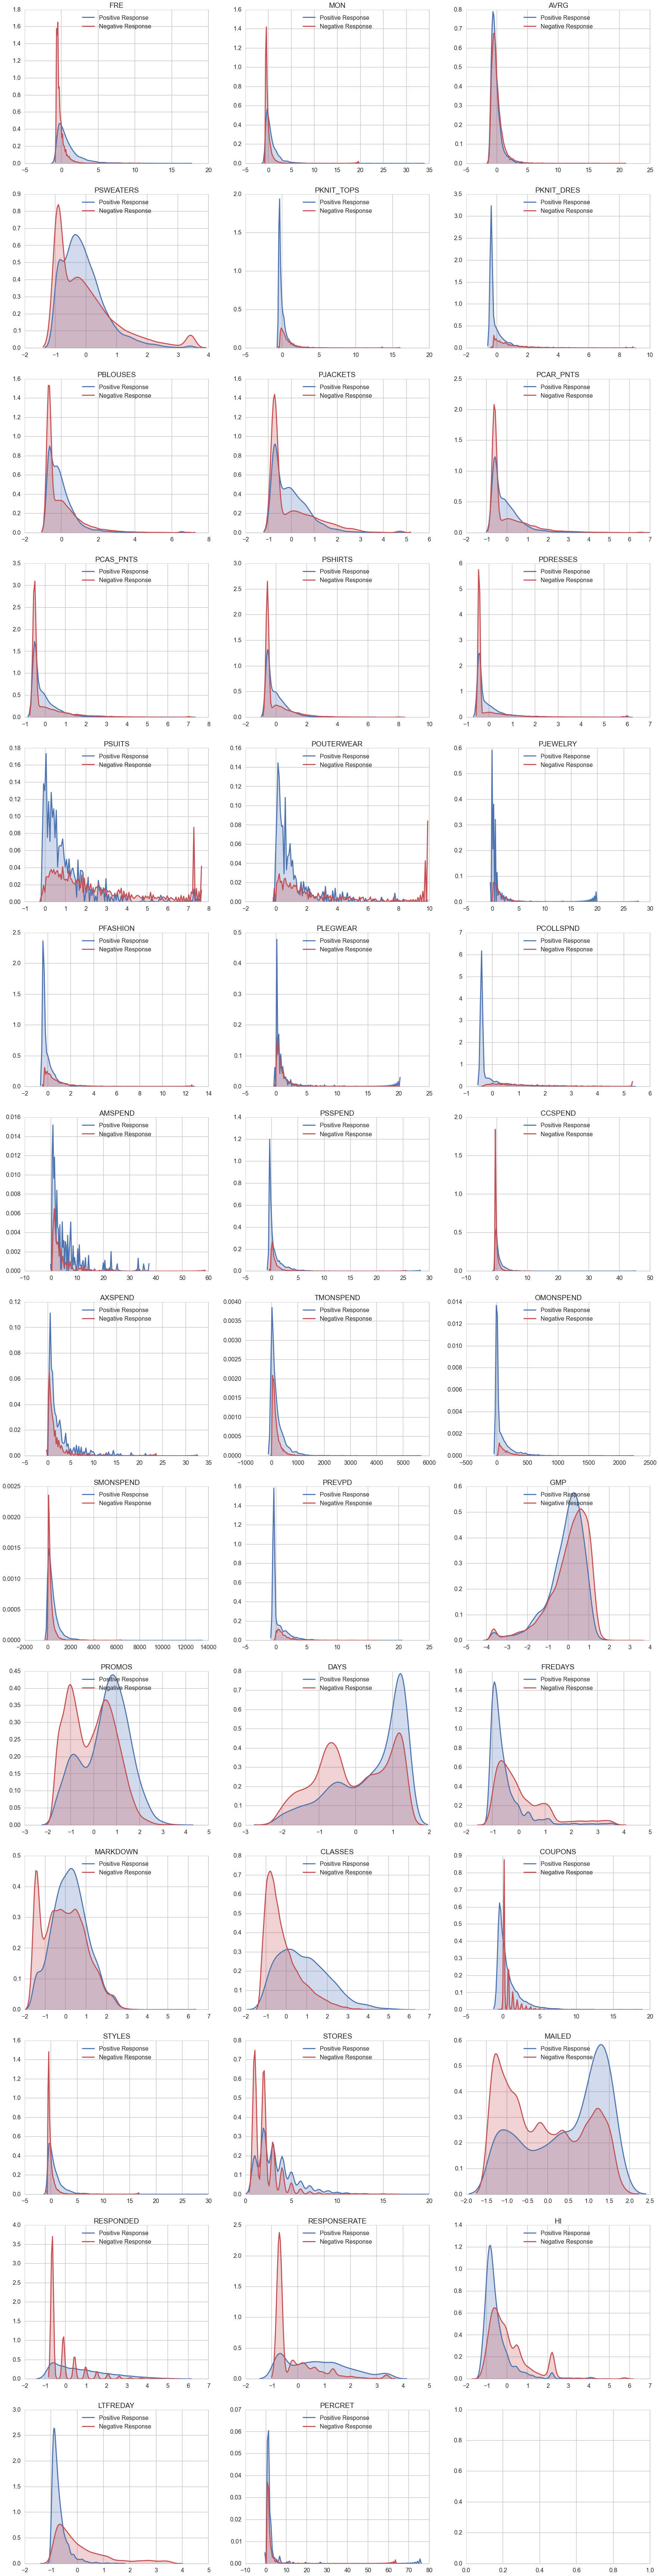

In [24]:
#your code here
fig, axes = plt.subplots(nrows=14, ncols=3, tight_layout=False, figsize=(30,40))
plt.subplots_adjust(top=2.5)
colors = sns.color_palette()
for ax,ccol in zip(axes.ravel(), ccols):
    pres = dftouse.loc[dftouse.RESP==1][ccol] # positive responses
    nres = dftouse.loc[dftouse.RESP==0][ccol] # negative responses
    sns.kdeplot(pres, shade=True, ax=ax, color=colors[0], label="Positive Response")
    sns.kdeplot(nres, shade=True, ax=ax, color=colors[2], label="Negative Response")
    ax.set_title(ccol)
    ax.legend(frameon=False, loc='upper center')

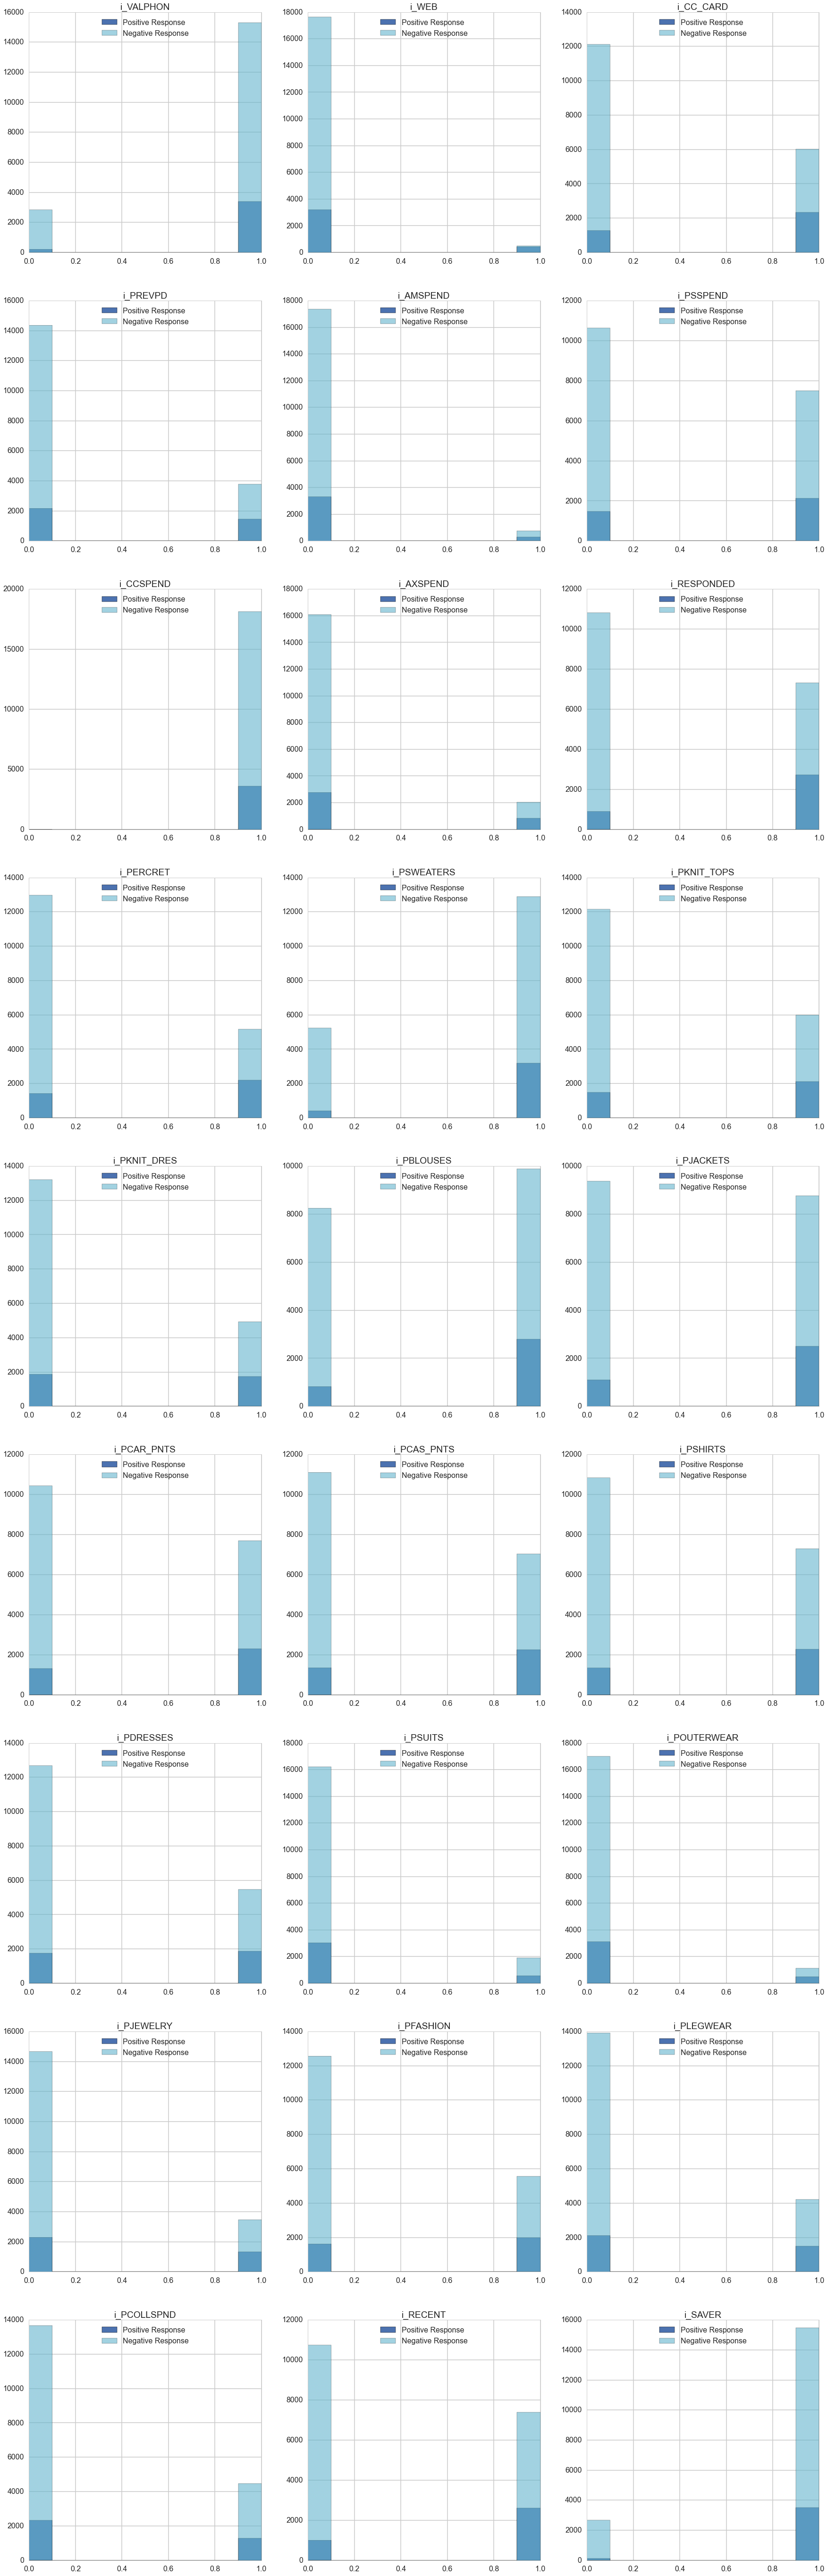

In [25]:
#your code here
fig, axes = plt.subplots(nrows=9, ncols=3, tight_layout=False, figsize=(30,40))
plt.subplots_adjust(top=2.0)
colors = sns.color_palette()
for ax,ind in zip(axes.ravel(), INDICATORS):
    pres = [dftouse.loc[dftouse.RESP==1][ind]] # positive responses
    nres = [dftouse.loc[dftouse.RESP==0][ind]] # negative responses
    ax.hist(pres, color = colors[0], label="Positive Response", bins= np.arange(0,1.1,0.1))
    ax.hist(nres, color = colors[5], label="Negative Response",bins= np.arange(0,1.1,0.1), alpha =0.6)
    ax.set_title(ind)
    ax.legend(frameon=False, loc='upper center')

*your answer here*

Feature by themselves don't look very promising. In the case of kde's, there is too much overlap between positive and negative responses, the estimated densities/distributions are similar for both types of responses. In the case of histograms, maybe we can find a little bit more useful information, the idea is to look for features in which the proportion between negative and positive responses changes radically depending if the value of the indicator is zero or one; for example, in i_WEB the proportion of positive respones when the feature takes value one is pretty high (82%), the problem is that very few observations have a value of 1 for this feature. Many of the other features have proportions around 20%, which is the "natural" proportion between positive and negative responses in the sample, so they are not particularly useful.

You can take a look at the results below to see the proportions for each histogram:

### Writing code for a classifier

We will now take this data and write a classifier to predict the response, which is in the `RESP` column of `dftouse`. This response corresponds to asking the question: will a user targeted with our advertisement respond or not?

#### 1.4 Train a SVM on this data.

In [26]:
from sklearn.svm import LinearSVC

We set up a classifier using `LinearSVC`. This algorithm implements a linear SVM. We explicitly pass the standard SVM hinge loss (the default for this classifier in `sklearn` is the squared hinge loss). We choose the linear SVM here as our data size is fairly large, and kernelized SVM training time scales as the square of the number of the samples. Linear SVM, on the other hand, is fast.

In [27]:
clfsvm=LinearSVC(loss="hinge")
Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
Xmatrix=dftouse[lcols].values
Yresp=dftouse['RESP'].values

In [28]:
Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

Use `GridSearchCV` over the parameter grid of regularization coefficients in the `Cs` array to get the best fit classifier using 5-fold cross validation. What value of `C` is the best one to choose? What is the accuracy? (This code will likely take a few minutes to run). Store the best classifier in  variable `best`. Fit the data again with this best classifier, and report on the accuracy of this classifier. HINT: a `GridSearchCV` instance (the variable a `GridSearchCV` object is stored in) has properties such as `best_params_`, `best_score_`, `grid_scores_`, and `best_estimator_`

In [29]:
#your code here
from sklearn.grid_search import GridSearchCV
gs = GridSearchCV(clfsvm, param_grid=dict(C=Cs), cv=5, n_jobs=1, scoring = 'accuracy')
gs.fit(Xmatrix_train,Yresp_train)
best = gs.best_estimator_

In [30]:
#calculate the accuracy here
#your code here
clf = best.fit(Xmatrix_train,Yresp_train)
training_accuracy = clf.score(Xmatrix_train,Yresp_train)
test_accuracy = clf.score(Xmatrix_test,Yresp_test)
training_accuracy, test_accuracy

(0.83722152855359133, 0.8391844243446267)

#### 1.5 Write a function to carry out grid-searched cross validation and use it on the SVM

Lets take the code above and encapsulate it into a function, since we are going to be running many, many classifiers here in this homework. 

You must provide below a function `cv_optimize`, which uses a Grid Search in parameters, and a default of 5-fold cross-validation. It takes as arguments a classifier `clf`, with hyper-parameter dictionary `parameters`, training feature matrix `X`, response `y`, number of folds `n_folds`, and custom scoring function `score_func`. It performs cross-validation using `GridSearchCV` along with a grid-search of hyperparameters. It obtains the best model by the average cross-validation score (allowing for a custom cross-validation score, not just those provided by `sklearn`), and finally returns this best model. (A custom scorer can be provided in the optional `score_func` argument to `cv_optimize`. Its default value should be `None`.)

This `cv_optimize` function is passed to the `do_classify` function below, so you can see how it is to be used before writing it.

In [31]:
"""
Function
--------
cv_optimize

Inputs
------
clf : an instance of a scikit-learn classifier
parameters: a parameter grid dictionary thats passed to GridSearchCV (see above)
X: a samples-features matrix in the scikit-learn style
y: the response vectors of 1s and 0s (+ives and -ives)
n_folds: the number of cross-validation folds (default 5)
score_func: a score function we might want to pass (default python None)
   
Returns
-------
The best estimator from the GridSearchCV, after the GridSearchCV has been used to
fit the model.
     
Notes
-----
see do_classify and the code below for an example of how this is used
"""
#your code here
def cv_optimize(clf, parameters, X, y, n_folds, score_func):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=1, scoring=score_func)
    gs.fit(X,y)
    best = gs.best_estimator_
    return best   

We use this function to implement a function `do_classify` which provides a general interface to any classifier. This function `do_classify` can take either a `mask` or a `reuse_split` dictionary to specify which is the training set and which is the test set in X and y. In the former case the mask is used to choose which samples to use as training samples and which ones to use as test samples. In the latter case a dictionary is used to directly provide training and test sets. This is useful when the splits already been done and we want to test multiple classifiers on the same test set to compare their performance. An example of the `reuse_split` usage will be seen further down in this notebook. 

We construct the features from `featurenames` columns of the dataframe `indf`, while the column name `targetname` is used with `target1val` as the value that provides a `1` or `+ive` instance. A custom scorer can be provided in the optional `score_func` argument (with default value `None`). `n_folds` is the number of cross-validation folds, set to a default value of 5.

The function prints out the accuracy score on the training and test data, and also the confusion matrix associated with this classifier (more about confusion matrix in the next part of the homework). It returns the best_fit classifier, along with the training and test sets.

Note that the `parameters` dictionary is use to provide a parameter dictionary in the style of `GridSearchCV`, which indeed is used through the `cv_optimize` you provided.

In [32]:
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print ("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print ("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

We show how to use this by training the same linear SVM classifier with hinge loss. This classifier will once again be stored in the variable `clfsvm`. This takes a few minutes to run on a circa 2013 Macbook Air. Notice how we use this function carefully, as this will be an example of the usage of this function.

In [33]:
%%time
clfsvm, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,lcols, u'RESP',1, mask=mask)

using mask
############# based on standard predict ################
Accuracy on training data: 0.84
Accuracy on test data:     0.84
[[5409   33]
 [ 981  100]]
########################################################
CPU times: user 2min 11s, sys: 636 ms, total: 2min 11s
Wall time: 2min 13s


/Users/matiascuadracourt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


The results obtained ought to be very similar to the efforts you put in earlier. If not its likely you wrote `cv_optimize` wrong. (Remember that we are using the same mask).

We'll reuse the training and test sets you computed above later in the homework. We do this by putting them into a dictionary `reuse_split`

In [34]:
reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

## 2. Estimate costs and benefits from assumptions and data

### Our data is highly asymmetric

First notice that our data set is very highly asymmetric, with positive `RESP`onses only making up 16-17% of the samples.

In [35]:
print ("whole data set", dftouse['RESP'].mean())#Highly asymmetric
print ("training set", dftouse['RESP'][mask].mean(), "test set", dftouse['RESP'][~mask].mean())

('whole data set', 0.16609935602575898)
('training set', 0.16626141815075246, 'test set', 0.16572129388318257)


This means that a classifier which predicts that EVERY customer is a negative has an accuracy rate of 83-84%. By this we mean that **a classifier that predicts that no customer will respond to our mailing** has an accuracy of 83-84%!

#### 2.1 Compare the accuracy of the SVM to the no-customer-responds baseline

Based on your comparison, and using accuracy as a metric, does the classifier seem worthwhile pursuing?

*your answer here*

I would say that doesn't seem worthwhile pursuing. The accuracy is just almost the same as the baseline, which is 84%. This is only based on accuracy as a metric, there could other metrics under which the classifier could be worthwhile.

But we havent asked the most important question. Is accuracy really the relevant metric?

### Costs and the Confusion Matrix

Our classifier above had, as one of its printed outputs, a confusion matrix. It looked like this:

In [36]:
ypred=clfsvm.predict(Xtest)
confusion_matrix(ytest, ypred)

array([[5409,   33],
       [ 981,  100]])

The matrix above is of this form:

![hwimages](./images/confusionmatrix.png)


**Important note**: In sklearn, to obtain the confusion matrix in the form above, always have the observed `y` first, i.e.: use as `confusion_matrix(y_true, y_pred)`

In our example, +ives (those with a 1 `RESP`onse) are people who respond to the mailing by going into the store and buying goods. These are also called observed positives (OP). And -ives (those with a 0 `RESP`onse) are those who do not respond to the mailing. These are also called observed Negatives. On our test set, we can print the observed positives and observed negatives respectively:

In [37]:
print ("OP=", ytest.sum(), ", ON=",ytest.shape[0] - ytest.sum())

('OP=', 1081, ', ON=', 5442)


We can make a similar calculation on the predictions of our SVM classifier made on the test set. This gives us the predicted negatives (PN): those customers who we predict will not respond to our mailing; and the predicted positives (PP), the customers who we predict will respond to our mailing by coming into the store to buy stuff.

In [38]:
print ("PP=", ypred.sum(), ", ON=",ytest.shape[0] - ypred.sum())

('PP=', 133, ', ON=', 6390)


In addition to these four quantities, the confusion matrix gives us more details on proper classifications and mis-classifications from our classifier:

- the samples that are +ive and the classifier predicts as +ive are called True Positives (TP). These are folks we correctly identified as responders,and thus sending them a mailing would result in a sale for us. True Positives are great. We do incur the cost of mailing them, but we like to because they will come into the store to buy.
- the samples that are -ive and the classifier predicts (wrongly) as +ive are called False Positives (FP). False Positives incur us the cost of mailing them as well, but are not very costly. These are people who wouldnt have responded, but we sent them a mailing because our classifier mispredicted them as buyers. Thus, for them, we only incur the cost of preparing the mailing and mailing it to them.
- the samples that are -ive and the classifier predicts as -ive are called True Negatives (TN). These are folks we correctly identified as not-responding, and thus we dont waste any money on sending them a mailing. This is a great classification for us.
- the samples that are +ive and the classifier predicts as -ive are called False Negatives (FN). False negatives are VERY costly: these are folks who would have responded to us had we mailed them, but we didnt target them, leading to huge lost sales per person. Notice that our SVM classifier has tons of False Negatives

It is not enough to simply identify these categories from the confusion matrix. Rather, we want to sit down with our business team and identify the costs associated with each of the 4 classification situations above. Keep in mind that these costs might even change from year to year or even more suddenly: this is why it is important to have marketing and sales people on your data science teams. (See Patil, D. J. Building data science teams. " O'Reilly Media, Inc.", 2011.
 for more details).
 
 Fortunately you have talked to your domain experts and done just that!

#### Costs for True Positives, False Negatives, False Positives, and True Negatives

Lets categorize the costs for each one of these alternatives.

Lets assume the amortized cost of preparing a mailing and mailing it is \$3. Lets assume additionally that the profit margin on a sale is 30% (we are a high end clothing chain).

True Negatives cost us nothing but gain us nothing either.

In [39]:
tnc=0.0 #tnr stands for "true negative cost"

From the average cost of a sale, and the 30% profit assumption, we calculate `tpc`, the cost of a true positive. Note: `tpc` must be negative, since we are talking about costs.

The `tpc` takes into account the cost of mailing to the respondent, and since our mailing works, we subtract out the profit. We use the average of the `AVRG` column, which is the average money spent by a customer on each visit.

In [40]:
prep_and_mail=3
profit_margin=0.3
tpc=prep_and_mail - df.AVRG.mean()*profit_margin 
tpc

-31.166731600736753

The false negative is a lost sale for us! We didnt mail them, and they didnt spend the money. They would have if we mailed them. So we lost a certain profit per such false negative! Thus the false-negative cost, given by `fnc`, is:

In [41]:
fnc = df.AVRG.mean()*profit_margin
fnc

34.16673160073675

This leaves us with False positives. This is a person who would not have responded but you wasted $3 on. So the false positive cost, (`fpc`) is:

In [42]:
fpc=prep_and_mail
fpc

3

####Cost  and Utility Matrix

We then use these costs to write a **risk or cost matrix** in the same form as the confusion matrix above. 

![cost matrix](images/costmatrix.png)

In [43]:
risk_matrix=np.array([[tnc, fpc],[fnc, tpc]])
risk_matrix

array([[  0.       ,   3.       ],
       [ 34.1667316, -31.1667316]])

Notice that the cost of a false positive is 11 times less than the cost of a false negative. As is often the case in situations in which one class dominates the other, the costs of one kind of misclassification: false negatives are differently expensive than false positives. We saw above that FN are more costly in our case than FP. Similar situations arise in cancer prediction, for example, where a FP only means that you diagnosed a healthy person with cancer, but a FN means that you misdiagnosed a cancer patient as healthy: possibly killing them in the process!

The negative of the cost matrix is called the **utility matrix or profit matrix** `u`. Here we calculate this utility matrix, which we shall use in the next part of the homework.

In [44]:
u = - risk_matrix
u

array([[ -0.       ,  -3.       ],
       [-34.1667316,  31.1667316]])

Ok! Now we can use this profit matrix to calculate the profit that the SVM classifier can land us. 

#### Average Profit Per Person

We can compute the average profit per person using the following formula, which calculates the "expected value" of the per-customer profit (the $P$ below stands for "predicted" and $O$ for observed):



\begin{eqnarray}
Profit &=& u(+P,+O) \times p(+P,+O) \\
       &+& u(+P,-O) \times p(+P,-O) \\
       &+& u(-P,+O) \times p(-P,+O) \\
       &+& u(-P,-O) \times p(-P,-O) 
\end{eqnarray}


which gives


$$ Profit =  \frac{( TP \times -TPC )+ ( FP \times -FPC ) + ( FN \times -FNC ) + ( TN \times -TNC )}{N}$$

where N is the total size of the test set, +P means predicted positive, -O is observed negative, and so on and so forth. The formula above just weighs the profit of a combination of observed and predicted with the out-of-sample probability of the combination occurring. The probabilities are "estimated" by the corresponding confusion matrix on the **test set**, which leads to the second formula. $-TPC$ is just the 'true positive' utility (similar for the others...).

The profit can thus be found by multiplying the utility matrix by the confusion matrix elementwise, and dividing by the sum of the elements in the confusion matrix, or the test set size.

We implement this process of finding the average profit per person in the `average_profit_pp` function below:

In [45]:
def average_profit_pp(y, ypred, u):
    c=confusion_matrix(y,ypred)
    score=np.sum(c*u)/np.sum(c)
    return score

But before we make this calculation for our SVM classifier, we need to first check what profit or cost our baseline classifier which assumes that no customer will respond, incurs.

### Establishing Baseline Classifiers via profit

The simplest classifiers you can think of are the "send to everyone" and "dont send to everyone" classifiers. We explain these below. If we are going to write any more complex classifiers we should at-least outperform these.

#### Dont Send to Anyone Baseline Classifier 

This is the "majority" classifier we talked about earlier. We dont send mailings to anyone because we believe that **no-one will respond**. Thus this classifier predicts everyone to be a 0 or -ive, a non-respondent. Remember, this classifier has a 83-84% accuracy.

We write a confusion matrix `dste` for the "dont send to everyone" model (not the best acronym, I know!), and calculate the average profit per person as `dsteval`. 

In [66]:
testsize = dftouse[~mask].shape[0]
ypred_dste = np.zeros(testsize, dtype="int")
print (confusion_matrix(ytest, ypred_dste))
dsteval=average_profit_pp(ytest, ypred_dste, u)
dsteval

[[5442    0]
 [1081    0]]


-5.6621549686335166

#### 2.2 For this baseline classifier question, explain the value we got.

*your answer here*

This value means that expected loss per customer under the "don't send to everyone" model is 5.34 dollars. This is the alternative cost of missing all those sales that could come from the true positives.

#### 2.3 Send to Everyone Baseline Classifier

This is the other extreme. In this case we **predict everyone as responders** and send the mailing to everyone. In other words, we predict everyone on the test set to be a 1. Print out both the confusion matrix and `steval`, the average profit per person, for this case. Based on this result, which one of these two classifiers is the one to beat? Why?

In [46]:
#your code here
testsize = dftouse[~mask].shape[0]
ypred_ste = np.ones(testsize, dtype="int")
print (confusion_matrix(ytest, ypred_ste))
steval=average_profit_pp(ytest, ypred_ste, u)
steval

[[   0 5442]
 [   0 1081]]


2.6621549686335166

*your answer here*

From an economic point of view I clearly prefer the second one. Just as an aproximation, I will receive nearly 30,000 dollars from the true positives, and the cost of sending the email to all the false positives will be around 16,000. In the end I will be 14,000 dollars richer than status quo, which is not sending any emails.

Even though this classifir has a much more lower accuracy

#### 2.4 Compare the SVM classifier with these baselines

Using the SVM classifier we calculated, `clfsvm`, calculate the profit we can make

In [47]:
#your code here
svmval_averagepp=average_profit_pp(ytest, clfsvm.predict(Xtest), u)
svmval_averagepp

-4.6757459052965009

If you did this correctly, at this point you might be a bit dejected, and worried about that presentation you have to make to your boss in a few days.

#### 2.5 Implement logistic regression with Lasso based feature selection

In desperation, we run another classifier, a logistic regression with L1 regularization, using the `do_classify` function we defined above. L1 or Lasso regularization automatically does feature selection for us!

Return as the estimator `clflog`, and training and test sets `Xtrain`, `ytrain`, `Xtest`, and `ytest`. Let the regularization hyperparameter `C` range in powers of 10 from 0.001 to 100. Use the `reuse_split` dictionary we calculated earlier. Remember that we want to use "L1" or Lasso regularization: you can do this by passing `penalty="l1"` to the Logistic Regression: `clf=LogisticRegression(penalty="l1")`.

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
#your code here
clflog, Xtrain, ytrain, Xtest, ytest = do_classify(LogisticRegression(penalty="l1"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},dftouse,lcols, u'RESP',1, reuse_split=reuse_split)

using reuse split
############# based on standard predict ################
Accuracy on training data: 0.85
Accuracy on test data:     0.85
[[5311  131]
 [ 835  246]]
########################################################


Calculate the profit that this classifier gives us:

In [50]:
#your code here
clflog_val_averagepp = average_profit_pp(ytest, clflog.predict(Xtest), u)
clflog_val_averagepp

-3.2585014430222214

You will find that this logistic regression does a slightly better job, but does little to lift our despondency. What is wrong?

### Prediction and Re-prediction

In question 2.1 we asked how the accuracy of our SVM classifier compares to that of the baseline classifiers we tested. However, is this the real question of importance? Our dataset is a very lopsided data set with 84% of samples being negative. In such a case, accuracy is not a very good measure of a classifier.

Then, in question 2.4 and 2.5 we see that the performance of our SVM classifier, even with the "profit" metric instead of the accuracy metric is no big shakes. Indeed, it is outperformed by one of our baseline classifiers. Then we tried the Logistic Regression. That gave us some hope, but even there, the performance turned out to be awful.

What gives?

We were doing something wrong there.

In the case of such asymmetric costs, the `sklearn` API function `predict` is useless, as it assumes a threshold probability of having a +ive sample to be 0.5; that is, if a sample has a greater than 0.5 chance of being a 1, assume it is so. Clearly, when FN are more expensive than FP, you want to lower this threshold: you are ok with falsely classifying -ive examples as +ive. See Lab 5 for how this can be done.

You can think about this very starkly from the perspective of the cancer doctor. Do you really want to be setting a threshold of 0.5 probability to predict if a patient has cancer or not? The false negative problem: ie the chance you predict someone dosent have cancer who has cancer is much higher for such a threshold. You could kill someone by telling them not to get a biopsy. Why not play it safe and assume a much lower threshold: for eg, if the probability of 1(cancer) is greater than 0.05, we'll call it a 1.

Let us do this for our logistic regression example

#### Start with an arbitrary threshold t, and see how we fare at different thresholds for logistic regression

In [51]:
def t_repredict(est,t, xtest):
    probs=est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 > t)*1
    return ypred

We see average profits for multiple thresholds for the logistic regression classifier `clflog`. 

**(a) Average profit per person for t=0.5 (the usual case)**

In [52]:
average_profit_pp(ytest,clflog.predict(Xtest), u)

-3.2585014430222214

**(b) Confusion Matrix and average profit per person for t=0.05**

In [53]:
confusion_matrix(ytest,t_repredict(clflog, 0.05, Xtest))

array([[2428, 3014],
       [  36, 1045]])

In [54]:
average_profit_pp(ytest, t_repredict(clflog, 0.05, Xtest), u)

3.4182480737610583

**(c) average profit per person for t=0.95**

In [55]:
average_profit_pp(ytest, t_repredict(clflog, 0.95, Xtest), u)

-5.5920439395962163

Voila, at a 0.05 threshold we have a nice positive profit! (if you did this right...)

We see that in this situation, where we have asymmetric costs (1:15), we do need to change the threshold at which we make our positive and negative predictions. We need to change the threshold so that we much dislike false nefatives (same in the cancer case). Thus we must accept many more false positives by setting such a low threshold.

For otherwise, we let too many people slip through our hands who would have otherwise shopped at our store. Once we change the threshold, we can make a profit. And indeed, at $t=0.05$, our profit is higher than in the "Send to Everyone" case, which makes doing the classifier worth it! But how do we pick this threshold?

If you read through the lab, you know that we can use the utility or risk matrix to provide a rough threshold to pick for now for our classifier. (You will implement a more powerful method next). The idea is that we want to maximize utility or profit, so for each sample, we simply pick the class which does that. 

There is a caveat for SVM's though: we cannot repredict 1's and 0's directly for  `clfsvm`, as the SVM is whats called a "discriminative" classifier: it directly gives us a decision function, with no probabilistic explanation and no probabilities. (I lie, an SVM can be retrofitted with probabilities: see http://scikit-learn.org/stable/modules/svm.html#scores-probabilities, but these are expensive and not always well callibrated (callibration of probabilities will be covered later in our class)).

What do we do? The SVM does give us a measure of how far we are from the "margin" though, and this is an ordered set of distances, just as the probabilities in a statistical classifier are. This ordering on the distance is just like an ordering on the probabilities: a sample far on the positive side from the line is an almost very definite 1, just like a sample with a 0.99 probability of being a 1 is an almost very definite 1.

To handle the SVM then, and, in the interests of time, we shall skip over fixing thresholds from the utility matrix in this homework, implementing instead the more powerful and generalizable methods of using ROC and profit curves next! Indeed these methods will also help us to deal with the imbalance we have in our data set, with 84% negatives (5 negatives for every positive, roughly).

## 3. Comparing Models with ROC and Profit curves.

### Thresholds, Comparing Models, and the ROC Curve 

ROC curves are a set of classifiers, many of them, each point corresponding to a different threshold (go read Lab 6 for more details). They are useful to compare classifiers to each other and also to baseline models.
(In the standard scenario, where we used the  classifier accuracy, this threshold is implicitly set at 0.5, and we have only one point on the ROC curve.).

The practical way to do this is to order the samples by probability of being positive, or in the case of the SVM, by the `decision_function` or distance from the separating hyperplane. Then consider the sample with the highest score or highest probability of being positive. At first, only this sample is positive. Then, we take the sample with the next highest score, and call it positive. As we go down the list, we go down a threshold in score or probability. 

Now, for each such situation: only 1 positive, now 2 positive,....you can imagine a different classifier with a different confusion matrix. It will have its own false positives, three positives, etc. Its actually the same original classifier, but with a different threshold each time.

As we keep going down the list, decreasing the threshold, more and more samples become positive, and at first, the true positives rise faster than the false positives. Once past a certain point, false positives increase faster than true positives. Now, if you want a balanced classifier, you look at this turn-around point...the northwest corner, so to speak. But if you want a classifier which penalizes false positives and false negatives differently, the point you want is different.

To make a ROC curve you plot the True Positive Rate, 

$$TPR=\frac{TP}{OP}$$

against the False Positive Rate,

$$FPR=\frac{FP}{ON}$$

as you go through this process of going down the list of samples. ROC curves are useful because they calculate one classifier per threshold and show you where you are in TPR/FPR space without making any assumptions about the utility matrix or which threshold is appropriate.


A rote reading of the ROC curve (go to the "northwest" corner) is a bad idea: you must fold in the curve with any assumptions you are making about the utilities. In our case we have both an asymmetric data set, and asymmetric risk, so the north west corner may not be the right spot. Still, on the whole, a curve with a greater AUC (area under curve), or further away from the line of randomness, will give us a rough idea of what might be a better classifier.

We provide example code `make_roc` for you to calculate a ROC curve. Pass `proba=False` to `make_roc` for non-probabilistic classifiers: notice how we use `decision_function` here instead of `predict_proba`.

This function uses `roc_curve` from sklearn: note that this function carries out the process we described and gives us back a triplet of `fpr`, `tpr`, and `thresholds`. We also calculate the `auc`, and plot the roc curve with thresholds, skipping every `labe` number of thresholds to make labels.

In [56]:
from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, color=None, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, color=color, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, color=color, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2, color=color
    )
    if labe!=None:
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--', color="black", linewidth=1.5)
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

Here is an example of the usage of this function. Play with it to see how to label things

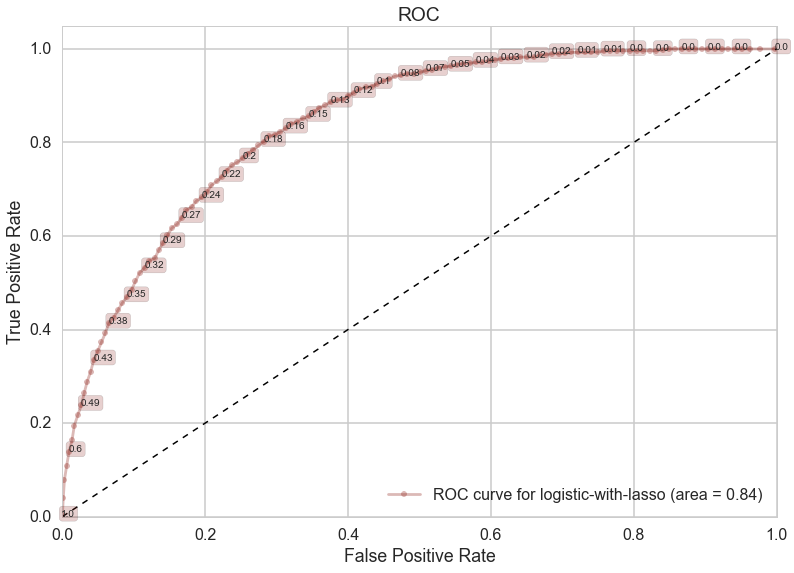

In [57]:
#notice for the first plot we do not pass an axes object. Subsequent calls to
#make_roc can use the returned axes object ax.
with sns.hls_palette(10, l=.3, s=.8):
    ax=make_roc("logistic-with-lasso",clflog, ytest, Xtest, labe=200, skip=50)

#### 3.1 Plot ROC curves

Plot ROC curves for the logistic regression classifier `clflog`, and linear SVM classifier `clfsvm` below. Label the curve for the former classifier `logistic-with-lasso`, and the latter classifier, `svm-all-features` . Choose colors using `with sns.color_palette("palletename")` that make the curves easily separable. (see https://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html)

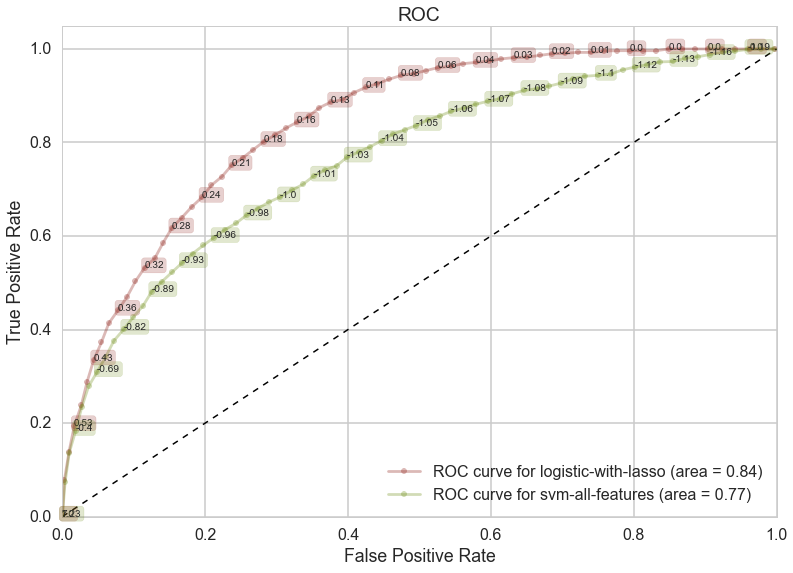

In [58]:
#your code here
# Please take into accoun that I added the parameter color to the function make_roc(), in order
# to make the boxes of the treshold from different colors
colors =  sns.hls_palette(10, l=.3, s=.8)
ax = make_roc("logistic-with-lasso",clflog, ytest, Xtest, labe=300, skip=100, color=colors[0])
make_roc("svm-all-features",clfsvm, ytest, Xtest, labe=300, skip=100, proba=False, color=colors[2], ax=ax)

#### Tangent lines on a ROC curve

To see what needs to be done to calculate the correct spot on the ROC curve, or correct threshold for our classifier, see Lab 6. It basically involves drawing tangent lines to the ROC curves classifier, where the slope is:

$$slope = r \frac{p(0A)}{p(1A)}$$

where

$$r=\frac{c_{FP} - c_{TN}}{c_{FN} - c_{TP}}$$

The lines of equal cost are given by (these are straight lines for fixed Cost):

$$TPR = \frac{1}{p(1A)(c_{FN} - c_{TP})} \left ( p(1A) c_{FP} + p(0A) c_{TN} - Cost \right ) + r \frac{p(0A)}{p(1A)} \times FPR$$

Minimum cost means we maximize the intercept, and thus we must look for tangent lines to the ROC curve of the classifier (the appropriate thresholded classifier must be on the ROC curve).


(See Provost, Foster J., and Tom Fawcett. "Analysis and visualization of classifier performance: Comparison under imprecise class and cost distributions." KDD. Vol. 97. 1997 and Fawcett, Tom. "ROC graphs: Notes and practical considerations for researchers." Machine learning 31 (2004): 1-38.)

Further Reading: The book (online on Safari at Harvard) Provost, Foster, and Tom Fawcett. Data Science for Business: What you need to know about data mining and data-analytic thinking. " O'Reilly Media, Inc.", 2013 contains a great discussion of this and many other machine learning topics. (Also see https://ccrma.stanford.edu/workshops/mir2009/references/ROCintro.pdf and http://www.hpl.hp.com/techreports/2003/HPL-2003-4.pdf)

#### 3.2 Based on the tangent line idea, which classifier seems like a better one? Why? 

Calculate the slope of our tangent lines, and indicate roughly where these lines are tangent to the classifiers on the graph. Which classifier is better?

In [59]:
# your code here
# This code is taken from lab 6
z1=np.arange(0.,1., 0.02)
cost = risk_matrix
def rat(cost):
    return (cost[0,1] - cost[0,0])/(cost[1,0]-cost[1,1])
slope = rat(cost)*(np.mean(ytest==0)/np.mean(ytest==1))
z1=np.arange(0.,1., 0.02)
colors= sns.color_palette()
def plot_line(ax, intercept):
    plt.figure(figsize=(12,12))
    ax=plt.gca()
    ax.set_xlim([0.0,1.0])
    ax.set_ylim([0.0,1.0])
    make_roc("logistic-with-lasso",clflog, ytest, Xtest, labe=300, skip=100, color=colors[0])
    make_roc("svm-all-features",clfsvm, ytest, Xtest, labe=300, skip=100, proba=False, color=colors[2], ax=ax)
    ax.plot(z1 , slope*z1 + intercept, 'k-', linewidth=1.0, color='green')    
    

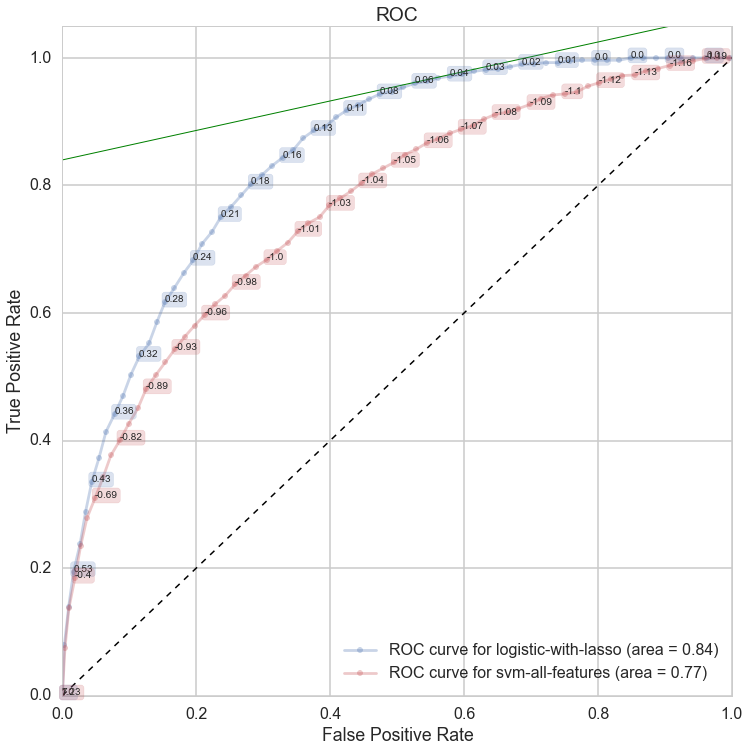

In [60]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
interact(plot_line, ax=fixed(ax), intercept=(0.0,1.0, 0.01))

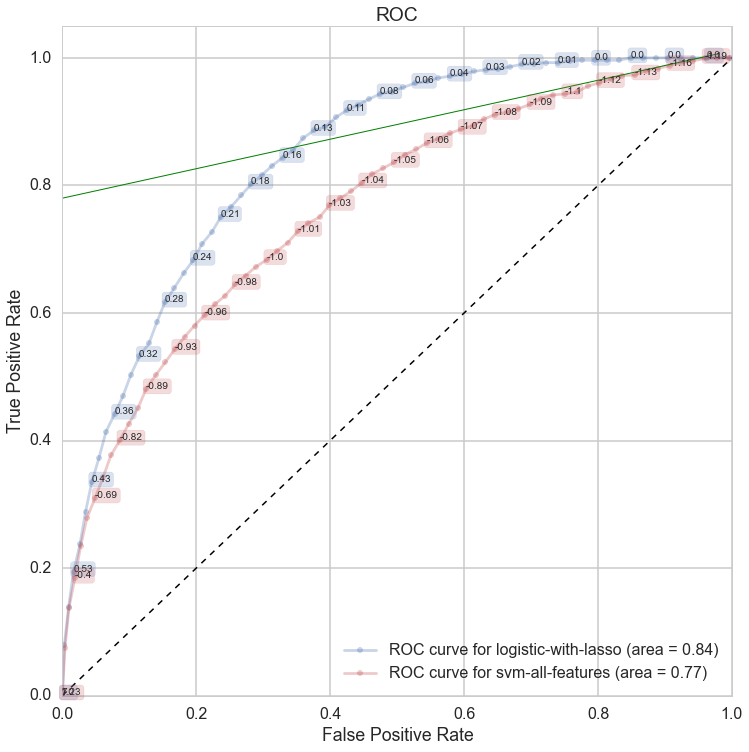

In [61]:
interact(plot_line, ax=fixed(ax), intercept=(0.0,1.0, 0.01))

In [76]:
# Sometimes the previous code hangs and my computer crashes beacause ipywidgets, sometimes it works sometimes it doesn't
# in case the previous
#cost = risk_matrix
#def rat(cost):
    #return (cost[0,1] - cost[0,0])/(cost[1,0]-cost[1,1])
#slope = rat(cost)*(np.mean(ytest==0)/np.mean(ytest==1))
#print (slope)
#print ("Slope: %0.3f" % (slope))
#colors= sns.color_palette()
#plt.figure(figsize=(12,12))
#z1=np.arange(0,1,0.02)
#ax=plt.gca()
#ax.set_xlim([0.0,1.0])
#ax.set_ylim([0.0,1.0])
#make_roc("logistic-with-lasso",clflog, ytest, Xtest, labe=300, skip=100, color=colors[0])
#make_roc("svm-all-features",clfsvm, ytest, Xtest, labe=300, skip=100, proba=False, color=colors[2])
#for k in np.arange(0,1,0.025):
    #ax.plot(z1, slope*z1 + k,'k--', linewidth=0.6, color='green')
    #label_kwargs = {}
    #label_kwargs['bbox'] = dict( boxstyle='round,pad=0.3', alpha=0.2, color='green')
    #ax.annotate(k, (0,k), **label_kwargs) 

*your answer here*

Logistic regression should be a better classifier, since it has a higher intercept. Intercept for the logistic regression is around 0.84, while the one for the SVM is 0.78

### Compare classifiers using profit curves

The proof is always in the pudding. So far we have seen the ROC curve which implements one classifier per threshold to pick an appropriate model. But why not just plot the profit on a ROC like curve to see which classifier maximizes profit? 

Just like in a ROC curve, we go down the sorted (by score or probability) list of samples. We one-by-one add an additional sample to our positive samples, noting down the attendant classifier's TPR and FPR and threshold. In addition to what we do for the ROC curve, we now also note down the percentage of our list of samples predicted as positive. Remember we start from the mostest positive, where the percentage labelled as positive would be minuscule, like 0.1 or so and the threshold like a 0.99 in probability or so. As we decrease the threshold, the percentage predicted to be positive clearly increases until everything is predicted positive at a threshold of 0. What we now do is, at each such additional sample/threshold (given to us by the `roc_curve` function from `sklearn`), we calculate the expected profit per person and plot it against the percentage predicted positive by that threshold to produce a profit curve. Thus, small percentages correspond to samples most likely to be positive: a percentage of 8% means the top 8% of our samples ranked by likelihood of being positive.

We provide code to plot a profit curve below, to which we must provide two critical functions:

- code to calculate expected profit given the TPR and FPR from a classifier (this is different than our `average_profit_pp` above as we now want this in terms of TPR and FPR.
- code to calculate the percentage of samples classified positive.given the TPR and FPR of a classifier.


We have implemented the function `percentage(tpr, fpr, priorp, priorn)` to calculate the percentage of samples classified positive at a given tpr/fpr (ie a classifier for a given threshold).

The variable `priorp` is the fraction of actual positive samples in the test set (OP), and `priorn` is the percentage of actual -ive (0) samples in the test set (ON).

In [62]:
def percentage(tpr, fpr, priorp, priorn):
    perc = tpr*priorp + fpr*priorn
    return perc

#### 3.3 Implement a function to calculate average profit per person

Implement a function `av_profit(tpr, fpr, util, priorp, priorn)` to calculate average profit per person given the utility matrix, the FPR rate, the TPR rate, and class balance.

You will need to look at the diagram of the confusion matrix, and the formula for profit, to derive the formula used in the function you must implement. Present your derivation below the code.


In [63]:
"""
Function
--------
av_profit

Inputs
------
tpr: true positive rate
fpr: false positive rate
util: utility matrix for this problem
priorp: the probability of observed +ives (OP) on our test set
priorn: the probability of observed +ives (ON) on our test set

   
Returns
-------
The average profit per person at this (fpr, tpr) point in this ROC space.
     
Notes
-----
see make_profit below for an example of how this is used
"""
#your code here
def av_profit(tpr, fpr, util, priorp, priorn):
    profit = priorp*(util[1][1]*tpr+util[1][0]*(1.-tpr))+priorn*(util[0][0]*(1.-fpr) +util[0][1]*fpr)
    return profit

*your answer here*

We can start from the formula that we already know:

$$ Profit =  \frac{( TP \times -TPC )+ ( FP \times -FPC ) + ( FN \times -FNC ) + ( TN \times -TNC )}{N}$$

We add zero to some of the expressions:

$$ Profit = \frac{1}{N}\times(-TPC\times TP)+(-FNC\times(FN+TP-TP))+(-TNC \times (TN+FP-FP))+(-FP
C\times FP)$$

We use the fact that: $$TN+FP=ON$$ $$FN+TP=OP$$

Then:

$$ Profit = \frac{1}{N}\times((-TPC\times TP)+(-FNC\times(OP-TP))+(-TNC \times (ON-FP))+(-FP
C\times FP))$$

We rearrange terms:


$$ Profit = \frac{OP}{N}\times \left(\frac{-TPC\times TP}{OP} \right)+ \frac{OP}{N} \times \left(-FNC\times \left(1-\frac{TP}{OP}\right) \right) + \frac{ON}{N} \times \left( -TNC \times \left(1-\frac{FP}{ON}\right) \right)+ \frac{ON}{N} \times \left(-FPC \times \frac{FP}{ON} \right)$$

And finally:

$$ Profit = PRIORP \times (-TPC \times TPR + (-FNC) \times (1-TPR))+ PRIORN \times ((-TNC) \times (1-FPR)+ (-FPC \times FPR)) $$

Which is the expression that we used for profit in our av_profit function

Given the definition of `percentage` and `av_profit`, we can now write code to make a profit curve.

In [64]:
def make_profit(name, clf, ytest, xtest, util, color=None, ax=None, threshold=True, labe=600, proba=True):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    priorp=np.mean(ytest)
    priorn=1. - priorp
    ben=[]
    percs=[]
    for i,t in enumerate(thresholds):
        perc=percentage(tpr[i], fpr[i], priorp, priorn)
        ev = av_profit(tpr[i], fpr[i], util, priorp, priorn)
        ben.append(ev)
        percs.append(perc*100)
    ax.plot(percs, ben, '-', alpha=0.5, markersize=5, color=color, label='utlity curve for %s' % name)
    if threshold:
        label_kwargs = {}
        label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.5, color=color
        )
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (percs[k], ben[k]), **label_kwargs)
    ax.legend(loc="lower right")
    return ax, ben

#### 3.4 Plot profit curves

Plot the profit curves using the function above for the logistic regression (`clflog`) and linear svm (`clfsvm`). Keep the same labels as the ROC curves. Also annotate on the graph (use matplotlib's `ax.annotate` function) the points on the profit curve corresponding to baseline models send-to-everyone annotated as STE (from `steval`) and dont-send-to-everyone annotated as DSTE (from `dsteval`). 

Comment on (a) why you only start making a profit at a certain percentage, and (b) what is the region on interest on the graph that you might want to communicate with the company managers in terms of maximizing your profit over the baseline (Hint: you might need to draw a horizontal line on this graph to communicate this region) (c) Which classifier makes us a greater profit?

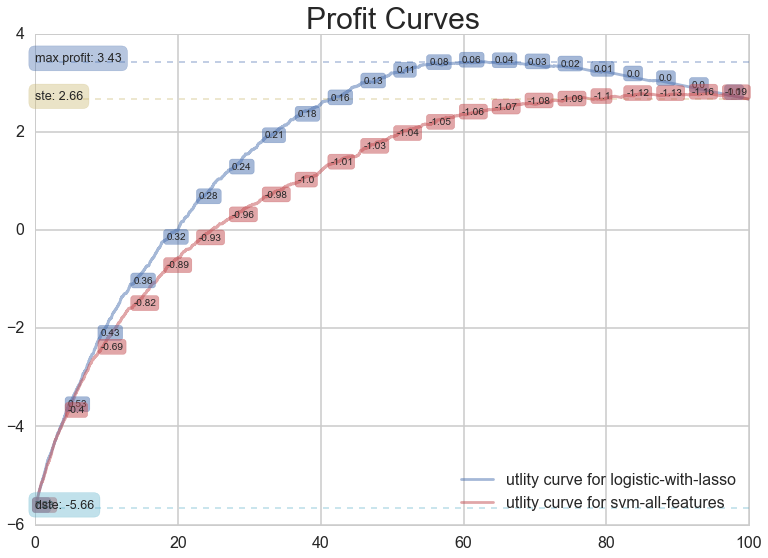

In [67]:
#your code here
util=u
colors =  sns.color_palette("deep", 10)
ax, benlog = make_profit("logistic-with-lasso",clflog, ytest, Xtest,util, labe=300, color=colors[0])
ax, bensvm = make_profit("svm-all-features",clfsvm, ytest, Xtest,util, labe=300, proba=False, color=colors[2], ax=ax)
dste = round(dsteval, 2)
ste = round(steval, 2)
ax.annotate("dste: "+str(dste), xy=(0,dste), bbox= dict(boxstyle='round,pad=0.5', alpha=0.4, color=colors[5]), size=12.5)
ax.axhline(ste, 0, 100, color=colors[4], linestyle='--', linewidth=1.7, alpha=0.4)
ax.annotate("ste: "+str(ste), xy=(0,ste), bbox= dict(boxstyle='round,pad=0.5', alpha=0.4, color=colors[4]), size=12.5)
ax.axhline(dste, 0, 100, color=colors[5], linestyle='--', linewidth=1.7, alpha=0.4)
ax.axhline(max(benlog),0,100,color=colors[0], linestyle='--', linewidth=1.7, alpha=0.4)
ax.annotate("max profit: "+str(round(float(str(max(benlog))),2)), xy=(0,str(round(float(str(max(benlog))),2))), bbox= dict(boxstyle='round,pad=0.5', alpha=0.4, color=colors[0]), size=12.5)
ax.set_title("Profit Curves", size=30)

##### *your answer here*

The x axis represents the percentage of customers to whom we will send an email, since sending an email is cheap relative to the benefit asociated to a true positive and the cost of a false negative, after a certain percentage of sent emails the company will start to make a profit.

We need to focus on the threshold of the profit curve that will maximize profits, i.e. where the profit curve reaches its maximum point. In the case of the svm, we look the lowest posible threshold, which implies sending emails to almost everyone. In the case of the logistic regression, the optimal threshold is around 0.06. Definitely, the logistic regression is the better classifier; its average profit per customer is, approximately, 30% higher than the average profit of the "send to everyone" strategy or the highest average profit per customer of the svm classifier.

## 4. Trying to improve the SVM: Feature Selection and Data Balancing

If you did the previous section right, you will find that the logistic regression model provides a better profit over some section of the profit curve than the baseline "send to everyone" classifier, while the SVM classifier is generally poor. At this might we might want to try all kinds of classifiers: from perceptrons to random forests. In the interest of time, and to study the SVM in some more detail, we'll restrict ourselves to trying to improve the SVM performance here. In real life you would try other classifiers as well.

 We wont be exhaustive in this improvement process either(which is something you should do on your project) in the interests of time, but we'll explore if feature-selection on the  SVM, and data balancing on the SVM (SVM's are known to perform better on balanced data) help.
 
( An aside: many classifiers such as SVM and decision trees struggle in their techniques on imbalanced data. You can read more at: see Weiss, Gary M., and Foster Provost. "The effect of class distribution on classifier learning: an empirical study." Rutgers Univ (2001). Also see http://pages.stern.nyu.edu/~fprovost/Papers/skew.PDF and http://www.cs.ox.ac.uk/people/vasile.palade/papers/Class-Imbalance-SVM.pdf for multiple ways to deal with the imbalance problem: balancing is not always the best option. `Sklearn` also provides a class weighting strategy: http://scikit-learn.org/stable/modules/svm.html#unbalanced-problems ). 

### Feature Selection

The Lasso, for example, implements internally, a form of feature selection by setting many coefficients to zero. Let us find coefficients that are non-zero.

#### Non zero lasso features

We write a function `nonzero_lasso` which takes the fit classifier `clfloglasso` as an argument, and spits out a dataframe of coefficients, sorted by the absolute magnitude of the coefficients. This way we can see which features dominated the logistic regression.

In [68]:
def nonzero_lasso(clf):
    featuremask=(clf.coef_ !=0.0)[0]
    return pd.DataFrame(dict(feature=lcols, coef=clf.coef_[0], abscoef=np.abs(clf.coef_[0])))[featuremask].sort('abscoef', ascending=False)

In [69]:
lasso_importances=nonzero_lasso(clflog)
lasso_importances.set_index("feature", inplace=True)
lasso_importances.head(10)

,abscoef,coef
feature,,
LTFREDAY,3.336967,-3.336967
i_CCSPEND,1.729296,-1.729296
FREDAYS,0.537433,0.537433
i_WEB,0.400710,0.400710
FRE,0.337871,0.337871
i_PSSPEND,0.293769,-0.293769
DAYS,0.254018,0.254018
i_POUTERWEAR,0.208116,-0.208116
i_PSWEATERS,0.187259,0.187259


#### 4.1 Feature importance using correlations

We can also get a notion of which features are important in the classification process by seeing how they correlate with the response. Implement some code to obtain the Pearson correlation coefficient between each of our features and the response. Do this on the training set only! Create a dataframe indexed by the features, which has columns `abscorr` the absolute value of the correlation and `corr` the value of the correlation. Sort the dataframe by `abscorr`, highest first, and show the top 25 features with the highest absolute correlation. Is there much overlap with the feature selection performed by the LASSO?

In [70]:
from scipy.stats.stats import pearsonr
correlations=[]
dftousetrain=dftouse[mask]
for col in lcols:
    r=pearsonr(dftousetrain[col], dftousetrain['RESP'])[0]
    correlations.append(dict(feature=col,corr=r, abscorr=np.abs(r)))

bpdf=pd.DataFrame(correlations).sort('abscorr', ascending=False)
bpdf.set_index(['feature'], inplace=True)
bpdf.head(25)

,abscorr,corr
feature,,
FRE,0.401698,0.401698
CLASSES,0.371556,0.371556
STYLES,0.360952,0.360952
RESPONDED,0.348575,0.348575
RESPONSERATE,0.327037,0.327037
MON,0.325053,0.325053
SMONSPEND,0.317951,0.317951
LTFREDAY,0.307536,-0.307536
STORES,0.304602,0.304602


In [71]:
# Code to see if there is overlaping, more comfortably:
dfsel = pd.DataFrame(columns=['lasso','abscorr'], index=range(25))
for i in range(25):
    dfsel.loc[i] = pd.Series({'lasso':lasso_importances.index[i],'abscorr':bpdf.index[i]})
dfsel    

,lasso,abscorr
0,LTFREDAY,FRE
1,i_CCSPEND,CLASSES
2,FREDAYS,STYLES
3,i_WEB,RESPONDED
4,FRE,RESPONSERATE
5,i_PSSPEND,MON
6,DAYS,SMONSPEND
7,i_POUTERWEAR,LTFREDAY
8,i_PSWEATERS,STORES
9,i_VALPHON,COUPONS


*your answer here*

There are some variables, such as LTFREDAY, FRE and RESPONDED, that do overlap, but a big number of the does not. For example, in the abscorr selection there is no indicator variables among the first nine, while using lasso selection there is 4 among them.

#### Why Feature Select?

One of the reasons feature selection is done, automatically or otherwise, is that there might be strong correlations between features. Also recall polynomial regression: a large number of features can lead to overfitting. Feature selection helps curb the problem of the curse of dimensionality, where centrality measures often used in statistics go wonky at higher dimensions. Between feature-engineering which we did some of, earlier, and feature selection, is where a lot of smarts and domain knowledge comes in. You will gain this with experience.

### Create a pipeline to feature-select, standardize and train!

We shall use sklearn pipelines to do correlation-with-response based feature selection for our SVM model. Maybe such feature-selection will improve the abysmal performance. 

This does not reduce the collinearity amongst the features, for which one either needs PCA, ICA, or some feature selection using the forward-backward algorithm. We do not have the time to approach it here. 

Its very important to do response based feature selection in the right way. If you remember, we separately standardized the training and test sets. This was to prevent **any** information about the overall mean and standard deviation leaking into the test set. 

But we played a bit loose with the rules there. We standardized on the entire training set. Instead we should have been standardizing separately in each cross-validation fold. There the original training set would be broken up into a sub-training and validation set, the standardization needed to be done on those separately. This can be implemented with `sklearn` pipelines.

Such kind of "data snooping" is relatively benign though, as it used no information about the response variable. But if you do any feature selection which uses the response variable, such as choosing the "k" most correlated variables from above, its not benign any more. This is because you have leaked the response from the validation into your sub-training set, and cannot thus be confident about your predictions: you might overfit. In such a situation, you must do the feature selection inside the cross-validation fold. See http://nbviewer.ipython.org/github/cs109/content/blob/master/lec_10_cross_val.ipynb from the 2013 course for a particularly dastardly case of this, where you see that the problem is particularly exacerbated when you have many more features than samples.

Lets do this here using sklearn pipelines.

In [72]:
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

Lets define a scorer which returns the absolute values of the pearson correlation between the feature and the response for each sample. The specific form of the scorer is dictated to us in the API docs for `SelectKBest`, see [here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html): the first argument must be an array of scores, and the second an array of p-values.

In [73]:
def pearson_scorer(X,y):
    rs=np.zeros(X.shape[1])
    pvals=np.zeros(X.shape[1])
    i=0
    for v in X.T:
        rs[i], pvals[i]=pearsonr(v, y)
        i=i+1
    return np.abs(rs), pvals    

Lets apply the feature selection to a model which did not have any automatic feature selection and performed rather poorly before: the linear SVM. 

The `Pipeline` feature of sklearn chains various parts of a machine learning algorithm together. In this case we want to chain feature-selection and training in such a way that both happen freshly for each cross-validation fold (we wont bother to standardize in each cross-validation fold separately here for brevity, although you might want to do this).
We use the `SelectKBest` meta estimator to select the 25 most correlated/anti-correlated features. We create an instance of this meta-estimator, `selectorlinearsvm`. We then combine it with the linear SVC estimators into the pipeline `pipelinearsvm`: the `Pipeline` function simply takes a list of `scikit-learn` estimators and wraps them together into a new estimator object, which can then be passed to `GridSearchCV` via our `do_classify` function. Notice how this new estimator object can be used exactly the same way as a single classifier can be used in `scikit-learn`..this uniformity of interface is one of the nice features of `sklearn`!

In [74]:
selectorlinearsvm = SelectKBest(k=25, score_func=pearson_scorer)
pipelinearsvm = Pipeline([('select', selectorlinearsvm), ('svm', LinearSVC(loss="hinge"))])


#### Let us run the pipelined classifier 

We'll run the classifier and compare the results using the ROC curve to the previous SVM result.

In [75]:
pipelinearsvm, _,_,_,_  = do_classify(pipelinearsvm, {"svm__C": [0.00001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,lcols, u'RESP',1, reuse_split=reuse_split)

using reuse split
############# based on standard predict ################
Accuracy on training data: 0.84
Accuracy on test data:     0.85
[[5390   52]
 [ 940  141]]
########################################################


What features did the pipelined classifier use? We can access them so:

In [76]:
np.array(lcols)[pipelinearsvm.get_params()['select'].get_support()]

array([u'FRE', u'MON', u'i_CC_CARD', u'PSSPEND', u'CCSPEND', u'TMONSPEND',
       u'OMONSPEND', u'SMONSPEND', u'PROMOS', u'DAYS', u'FREDAYS',
       u'CLASSES', u'COUPONS', u'STYLES', u'STORES', u'MAILED',
       u'RESPONDED', u'RESPONSERATE', u'HI', u'LTFREDAY', u'i_RESPONDED',
       u'i_PERCRET', u'i_PKNIT_TOPS', u'i_PFASHION', u'i_RECENT'], 
      dtype='<U12')

We plot the ROC curves, using the label `svm-feature-selected` for the pipelined classifier `pipelinearsvm`. We plot it alongside the older logistic-with lasso and all-features SVM for comparison

In [77]:
#with sns.color_palette("dark"):
    #ax=make_roc("svm-all-features",clfsvm, ytest, Xtest, None, labe=250, proba=False, skip=50)
    #make_roc("svm-feature-selected",pipelinearsvm, ytest, Xtest, ax, labe=250, proba=False, skip=50);
    #make_roc("logistic-with-lasso",clflog, ytest, Xtest, ax, labe=250, proba=True,  skip=50);

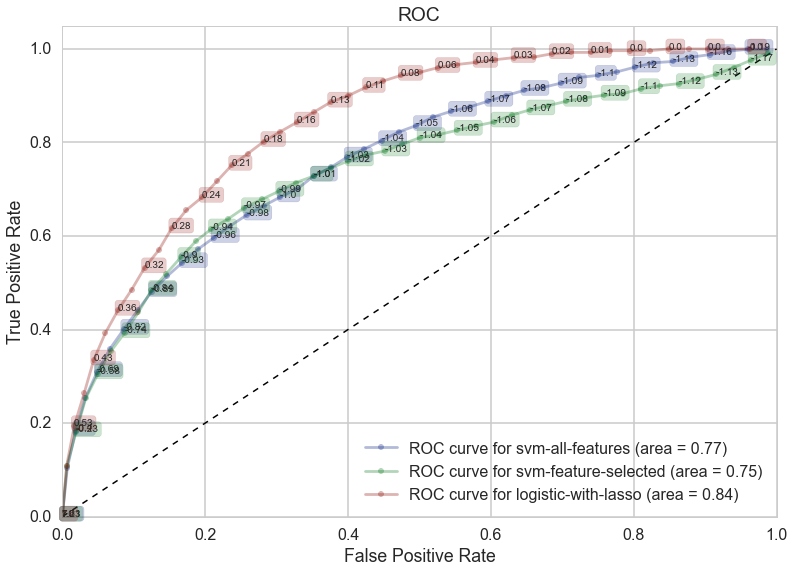

In [78]:
# I had to use this code instead of the given one so I could adjust the color of the thresholds over the curve
colors = sns.color_palette("dark")
ax=make_roc("svm-all-features",clfsvm, ytest, Xtest, labe=300, proba=False, skip=150, color=colors[0])
make_roc("svm-feature-selected",pipelinearsvm, ytest, Xtest, ax=ax, labe=300, proba=False, skip=150, color=colors[1])
make_roc("logistic-with-lasso",clflog, ytest, Xtest, ax=ax, labe=300, proba=True,  skip=150, color=colors[2])

Did we do much better or much worse? The results on the ROC curve are slightly better, comparable, or a bit worse, but still no great shakes compared to the logistic regression. And you can clearly see that the logistic regression will have a higher intercept and thus lower cost. One of the reasons for this is that SVM does not do terribly well on an unbalanced data set. So lets balance the data set.

### Balancing train set to test set for training.

In [79]:
jtrain=np.arange(0, ytrain.shape[0])
n_pos=len(jtrain[ytrain==1])
n_neg=len(jtrain[ytrain==0])
print (n_pos, n_neg)

2530 12687


There are many more negative samples in the training set. We want to balance the negative samples to the positive samples. So lets sample $n_{+}$ samples from the negative samples in the training set (without replacement).

In [80]:
ineg = np.random.choice(jtrain[ytrain==0], n_pos, replace=False)

We concatenate all the indexes and use them to select a new training set from the old one.

In [81]:
alli=np.concatenate((jtrain[ytrain==1], ineg))
alli.shape

(5060,)

In [82]:
Xtrain_new = Xtrain[alli]
ytrain_new = ytrain[alli]
Xtrain_new.shape, ytrain_new.shape

((5060, 68), (5060,))

We store these into a new split variable `reuse_split_new`.

In [83]:
reuse_split_new=dict(Xtrain=Xtrain_new, Xtest=Xtest, ytrain=ytrain_new, ytest=ytest)

Note that the test sets are identical as before. This is as, even though we are training the SVM classifier in the "naturally" unfound situation of balanced classes, we **must test it in the real-world scenario of imbalance**.

#### 4.2 Train a linear SVM on this balanced set

Train a non-feature-selected linear SVM on this new balanced set as a comparison to both our old SVM on the imbalanced data set `clfsvm` and the feature-selected linear SVM `pipelinearsvm`. Store this new classifier in the variable `clfsvm_b`.

Compare the performances of all three of these classifiers using the roc curve plot, with the new `clfsvm_b` labeled as `svm-all-features-balanced`. 

In [84]:
%%time
#your code here
clfsvm_b, Xtrain_new, ytrain_new, Xtest, ytest = do_classify(
    LinearSVC(loss="hinge"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,lcols, u'RESP',1, mask=None, reuse_split=reuse_split_new)

using reuse split
############# based on standard predict ################
Accuracy on training data: 0.74
Accuracy on test data:     0.63
[[3134 2308]
 [ 138  943]]
########################################################
CPU times: user 28.6 s, sys: 63.7 ms, total: 28.6 s
Wall time: 28.6 s


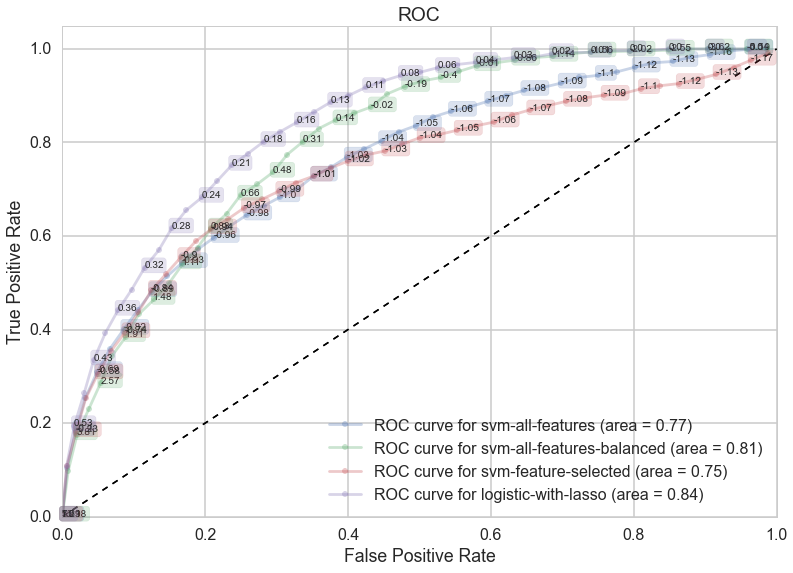

In [85]:
#your code here
colors = sns.color_palette("deep",10)
ax=make_roc("svm-all-features",clfsvm, ytest, Xtest, labe=300, proba=False, skip=150, color=colors[0])
make_roc("svm-all-features-balanced",clfsvm_b, ytest, Xtest, labe=300, proba=False, skip=150, color=colors[1])
make_roc("svm-feature-selected",pipelinearsvm, ytest, Xtest, ax=ax, labe=300, proba=False, skip=150, color=colors[2])
make_roc("logistic-with-lasso",clflog, ytest, Xtest, ax=ax, labe=300, proba=True,  skip=150, color=colors[3])

If you did this correctly, balancing the data set should have helped improve the performance of the SVM, way more than the feature selection did. We can look at the profit curves, adding in the logistic-regression this time:

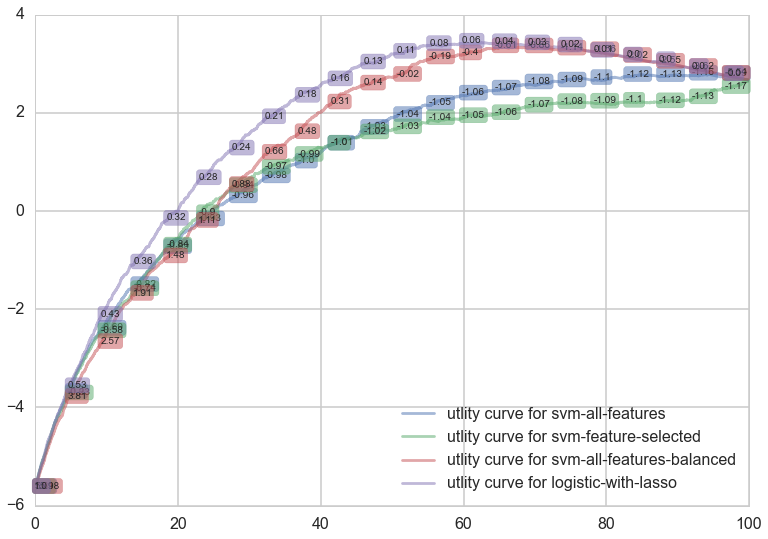

In [86]:
colors = sns.color_palette("deep",10)
ax = make_profit("svm-all-features",clfsvm, ytest, Xtest, u, labe=300, threshold=True, proba=False, color=colors[0])
make_profit("svm-feature-selected",pipelinearsvm, ytest, Xtest, u, labe=300, proba=False, color=colors[1]);
make_profit("svm-all-features-balanced",clfsvm_b, ytest, Xtest, u, labe=300, proba=False, color=colors[2]);
make_profit("logistic-with-lasso",clflog, ytest, Xtest, u, labe=300, threshold=True, color=colors[3]);

Indeed, the all-features, balanced data set SVM outperforms the other SVMs in making us a profit, and is starting to be competitive to the logistic regression. So why bother about feature selection at all?

The reason is that linear SVM's are about the simplest SVM's we can run. Perhaps the problem separates better with a non-linear boundary and may benefit from kernelizing the SVM.

### Running a kernelized SVM

But the problem with kernelization is that both the dimension of the data (vertical) and the dimension of the features (horizontal) land up impacting the run time. Kernelization is expensive. (quadratic in number of samples and linear in number of features).

Now, generally on a SVM you want to run on the full feature space, with strong regularization. But in the interests of this homework finishing in a finite number of time, we'll keep the feature selection going. Still, since run-time is quadratic on samples, we will need to subsample our training set down.

Let us try a Radial Basis Function (RBF) Kernel. Setting it up, we wish to use the smaller balanced set, but also engage in feature selection. The RBF kernel has two parameters `C`, which controls the number of support vectors: large `C`s (low regularization) mean many more support vectors; and $\gamma$, which is in the inverse square radius of the RBF kernel. A small $\gamma$ means a large radius scale, and favors smoother, less curved classifications. There is a tradeoff between the two, which you can read about here: http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html . Models with high C tend to take a lot of time to run (hours->days on my laptop), so we shall, in the interests of time fix the $C$, OR the support vectors allowed us at a reasonably large value and cross-validate only on $\gamma$.

#### 4.3 Implement a RBF based pipelined (feature-selected) classifier on the balanced set.

In [87]:
from sklearn.svm import SVC

To run a kernelized SVM you must import the `SVC` module from `sklearn`, instead of `linearSVC`. The time it takes to run this code is very variable, being much more at low regularization: high C, and  large gamma (which corresonds to a small kernel radius).   Use `pipesvm2` as the variable for the classifier. Choose hyperparameter `C` at `1e-8` and  values for `gamma`, with 3 exponential steps, `1e-5`, `1e-07`, and `1e-9`. Usually we want to run this on a much larger parameter space, but that would take a lot of time.

We first set up the pipeline:

In [88]:
selectorsvm2 = SelectKBest(k=25, score_func=pearson_scorer)
pipesvm2 = Pipeline([('select2', selectorsvm2), ('svm2', SVC())])


And then subsample to as little as 300 positive and negative samples each, since (as the SVC documentation says), the scaling with the number of samples is more than quadratic.

In [89]:
jtrain_new=np.arange(0, ytrain_new.shape[0])
ipos_new = np.random.choice(jtrain_new[ytrain_new==1], 300, replace=False)
ineg_new = np.random.choice(jtrain_new[ytrain_new==0], 300, replace=False)
subsampled_i=np.concatenate((ipos_new,ineg_new))
Xtrain_new2=Xtrain_new[subsampled_i]
ytrain_new2=ytrain_new[subsampled_i]

We set up a subsampled reuse dictionary below. Note that the testing sizes and positive-negative balance once again remain the same as in the original problem. 

In [90]:
reuse_split_subsampled=dict(Xtrain=Xtrain_new2, Xtest=Xtest, ytrain=ytrain_new2, ytest=ytest)

Your job now is to write the one-line `do_classify` incantation to run this classifier. This takes between 8-10 mins on my machine

In [91]:
%%time
#your code here
pipesvm2, _,_,_,_  = do_classify(pipesvm2, {"svm2__C": [1e8],"svm2__gamma":[1e-5,1e-7,1e-9]}, dftouse,lcols, u'RESP',1, reuse_split=reuse_split_subsampled)

using reuse split
############# based on standard predict ################
Accuracy on training data: 0.70
Accuracy on test data:     0.69
[[3650 1792]
 [ 225  856]]
########################################################
CPU times: user 14min 9s, sys: 1.18 s, total: 14min 10s
Wall time: 14min 12s


#### 4.4 Refit the best model on the entire balanced  data set, rather than the subsampling

With a best model selected, let us run the classifier again for the given value of $C$ and the fit value of $\gamma$ on the larger data set, and see our results. Output the classifier as `pipesvm3`. (Dont forget to run the entire pipeline again, even though there is no cross-validation. Also remember to pass the params directly to the classifier `SVC` as its arguments, setting the `parameters` argument of `do_classify` to `None`.) The code takes about 3-5 minutes on my computer.

In [96]:
%%time
#your code here
pipesvm3, _,_,_,_  = do_classify(pipesvm2, None, dftouse,lcols, u'RESP',1,reuse_split=reuse_split)

using reuse split
############# based on standard predict ################
Accuracy on training data: 0.84
Accuracy on test data:     0.85
[[5297  145]
 [ 842  239]]
########################################################
CPU times: user 13.2 s, sys: 156 ms, total: 13.4 s
Wall time: 13.4 s


## 5. Final steps: Making decisions, and writing to your boss

### Choosing a classifier and making a profit

#### 5.1 Compare multiple classifiers to make a decision on which one to use.

Using ROC curves and profit curves, compare the Lasso Logistic classifier `clflog`,  the kernel-svm feature-selected, balanced classifier `pipesvm3` you calculated in 4.3(labelled `rbf-svm-feature-selected-balanced`, and the linear svm all-features, balanced classifier, `clfsvm_b` on the original test set. You might need to zoom in to relevant parts of the curve. Comment on the results: which classifier is the best? How does the new RBF kernel SVM do now?

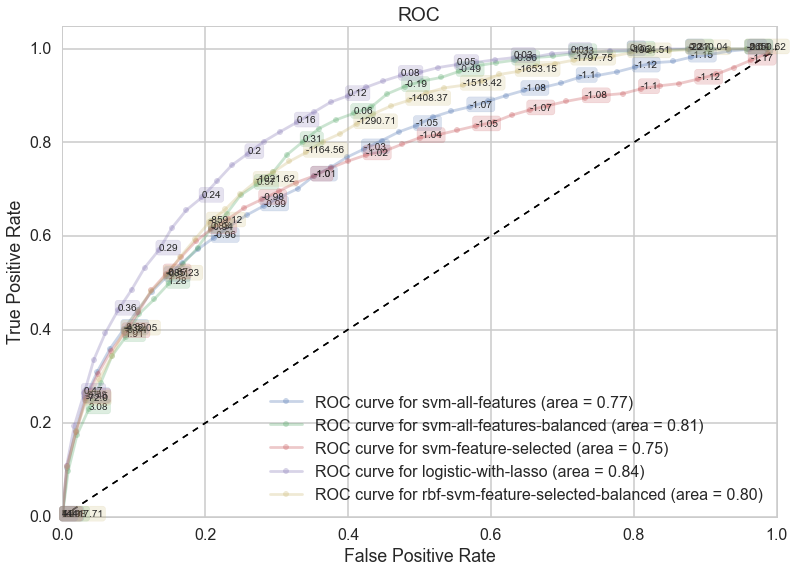

In [97]:
#your code here
colors=sns.color_palette("deep",10)
ax=make_roc("svm-all-features",clfsvm, ytest, Xtest, labe=450, proba=False, skip=150, color=colors[0])
make_roc("svm-all-features-balanced",clfsvm_b, ytest, Xtest, labe=450, proba=False, skip=150, color=colors[1])
make_roc("svm-feature-selected",pipelinearsvm, ytest, Xtest, ax=ax, labe=450, proba=False, skip=150, color=colors[2])
make_roc("logistic-with-lasso",clflog, ytest, Xtest, ax=ax, labe=450, proba=True,  skip=150, color=colors[3])
make_roc("rbf-svm-feature-selected-balanced",pipesvm3, ytest, Xtest, ax=ax, labe=450, proba=False,  skip=150, color=colors[4])

In [98]:
# First we will create another make_profit function that will facilitate the zoomed graph
def make_profit2(name, clf, ytest, xtest, util, color=None, ax=None, threshold=True, labe=600, proba=True):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    priorp=np.mean(ytest)
    priorn=1. - priorp
    ben=[]
    percs=[]
    for i,t in enumerate(thresholds):
        perc=percentage(tpr[i], fpr[i], priorp, priorn)
        ev = av_profit(tpr[i], fpr[i], util, priorp, priorn)
        ben.append(ev)
        percs.append(perc*100)
    ax.plot(percs, ben, '-', alpha=0.5, markersize=5, color=color)
    
    ax.legend(loc="lower right")
    return ax

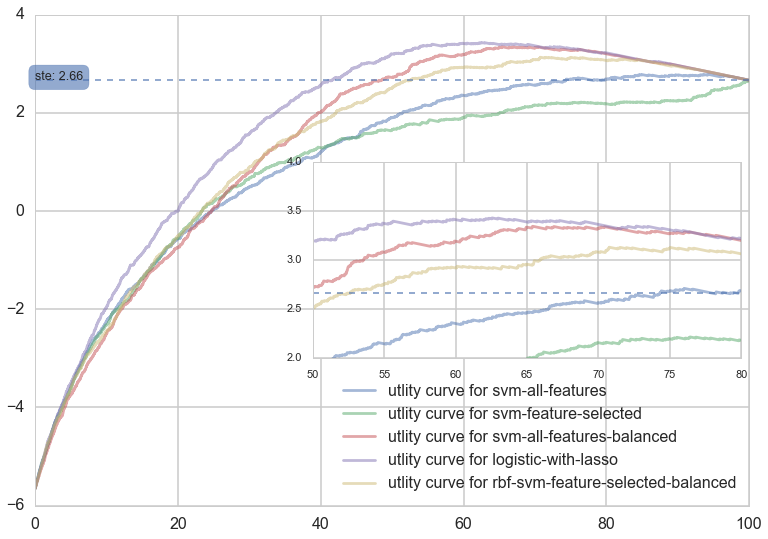

In [101]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
# This code is based on: http://akuederle.com/matplotlib-zoomed-up-inset/
fig, ax2 = plt.subplots()
# First the regular plots
colors=sns.color_palette("deep",10)
make_profit("svm-all-features",clfsvm, ytest, Xtest, u, labe=300, threshold=False, proba=False, color=colors[0], ax=ax2)
make_profit("svm-feature-selected",pipelinearsvm, ytest, Xtest, u, labe=300,threshold=False, proba=False, color=colors[1], ax=ax2);
make_profit("svm-all-features-balanced",clfsvm_b, ytest, Xtest, u, labe=300,threshold=False, proba=False, color=colors[2],ax=ax2);
make_profit("logistic-with-lasso",clflog, ytest, Xtest, u, labe=300, threshold=False, color=colors[3], ax=ax2);
make_profit("rbf-svm-feature-selected-balanced",pipesvm3, ytest, Xtest, u, labe=300, threshold=False,proba=False, color=colors[4], ax=ax2);
plt.annotate("ste: "+str(ste), xy=(0,ste), bbox= dict(boxstyle='round,pad=0.5', alpha=0.6, color=colors[6]), size=12.5)
plt.axhline(ste, 0, 100, color=colors[6], linestyle='--', linewidth=2, alpha=0.6)
# Here we make the zoomed plot
axins = zoomed_inset_axes(ax2, 2.0, loc=5) 
make_profit2("svm-all-features",clfsvm, ytest, Xtest, u, labe=300, threshold=False, proba=False, color=colors[0], ax=axins)
make_profit2("svm-feature-selected",pipelinearsvm, ytest, Xtest, u, labe=300,threshold=False, proba=False, color=colors[1], ax=axins);
make_profit2("svm-all-features-balanced",clfsvm_b, ytest, Xtest, u, labe=300,threshold=False, proba=False, color=colors[2],ax=axins);
make_profit2("logistic-with-lasso",clflog, ytest, Xtest, u, labe=300, threshold=False, color=colors[3], ax=axins);
make_profit2("rbf-svm-feature-selected-balanced",pipesvm3, ytest, Xtest, u, labe=300, threshold=False,proba=False, color=colors[4], ax=axins);
plt.axhline(ste, 0, 100, color=colors[6], linestyle='--', linewidth=2, alpha=0.6)
axins.set_xlim(50, 80) # apply the x-limits
axins.set_ylim(2, 4)
plt.yticks(visible=True,size=11);
plt.xticks(visible=True,size=11);

*your answer here*

I will pick the Logistic Regression as my favorite classifier. This classifier is slightly better than the features selected RBF SVM and the SVM all features balanced, there is a difference of 20 and 10 cents respectively between the average profit of my favorite classifier and the other two that I mentioned. Is a tight margin to say that a classifier is much better than the others, this margin could easily have small changes due to randomness in other data sets. Having said that, if I have to pick one, I would choose the Logistic Regression, mainly, for two reasons: first, was less intensive in terms of compuations, and second, people outside machine learning is more familiarized with regression type of procedures than SVM's.

#### 5.2 Choose the best performing classifier and use it to write a 5-6 slide presentation for your boss

Suppose that based on this targeted mailing from the previous year, you want to decide how many customers of your 100,000 person customer base you ought to target. Your boss has proposed a budget of $45,000

Include the information asked for below. Remember your audience is a pointy haired boss:

![pointy](http://assets.amuniversal.com/12e53860415d01300e80001dd8b71c47)

1. What the problem is?
2. What are the baselines..
3. Is a budget of \$45,000 is adequate? ( Remember the amortized cost of preparing the mailer and mailing it out per person is \$3 ). 
4. How profit changes with budget? Where is it maximized?
5. Your recommendations for the boss.

Create the slides using Google Presentations, including any additional annotated figures you made in your repository's hw3 branch. Copy the url of your presentation into the cell below, and include any additional computation at the bottom ofter the url.

*your answer here*


[https://docs.google.com/presentation/d/1YjJ0Yz7RLWqwYWhnBJ_Zwq_ak-RXjuj_fWkEsJqmJrw/edit?usp=sharing](https://docs.google.com/presentation/d/1YjJ0Yz7RLWqwYWhnBJ_Zwq_ak-RXjuj_fWkEsJqmJrw/edit?usp=sharing)

In [105]:
# Even from the graph is hard to tell which classifiert has the highest level of profits
# we use make_profit2 to create a function that returns the highest profit for a classifier
def max_profit(name,clf, ytest, xtest, util,proba=True):
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    priorp=np.mean(ytest)
    priorn=1. - priorp
    ben=[]
    percs=[]
    for i,t in enumerate(thresholds):
        perc=percentage(tpr[i], fpr[i], priorp, priorn)
        ev = av_profit(tpr[i], fpr[i], util, priorp, priorn)
        ben.append(ev)
        percs.append(perc*100)
    benmax = round(max(ben),2)
    print('The max profit for %s' % name + " is: " + str(benmax))

In [106]:
max_profit("svm-all-features",clfsvm, ytest, Xtest, u, proba=False)
max_profit("svm-feature-selected",pipelinearsvm, ytest, Xtest, u, proba=False)
max_profit("svm-all-features-balanced",clfsvm_b, ytest, Xtest, u, proba=False)
max_profit("logistic-with-lasso",clflog, ytest, Xtest, u, proba=True)
max_profit("rbf-svm-feature-selected-balanced",pipesvm3, ytest, Xtest, u, proba=False)

The max profit for svm-all-features is: 2.78
The max profit for svm-feature-selected is: 2.66
The max profit for svm-all-features-balanced is: 3.34
The max profit for logistic-with-lasso is: 3.43
The max profit for rbf-svm-feature-selected-balanced is: 3.13


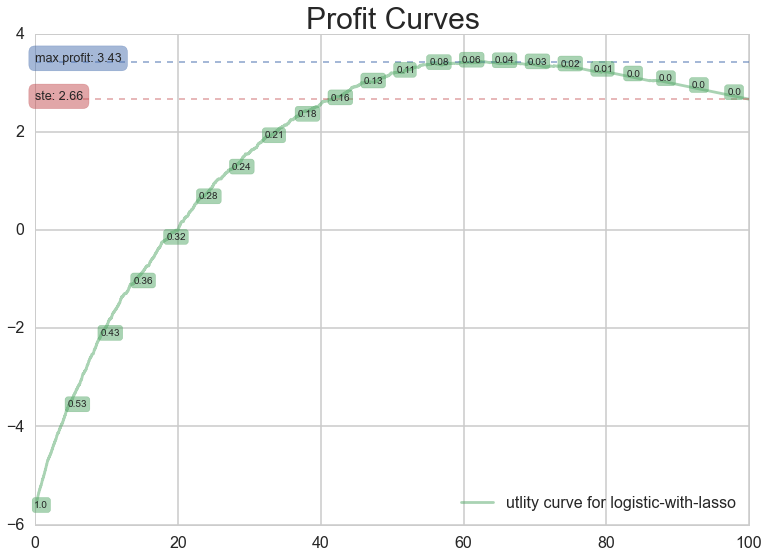

In [107]:
util=u
colors =  sns.color_palette("deep",10)
ax, benlog = make_profit("logistic-with-lasso",clflog, ytest, Xtest,util, labe=300, color=colors[1])
dste = round(dsteval, 2)
ste = round(steval, 2)
# ste
ax.axhline(ste, 0, 100, color=colors[2], linestyle='--', linewidth=2, alpha=0.4)
ax.annotate("ste: "+str(ste), xy=(0,ste), bbox= dict(boxstyle='round,pad=0.5', alpha=0.5, color=colors[2]), size=12.5)
# max profit
ax.axhline(max(benlog),0,100,color=colors[0], linestyle='--', linewidth=2, alpha=0.5)
ax.annotate("max profit: "+str(round(float(str(max(benlog))),2)), xy=(0,str(round(float(str(max(benlog))),2))),
            bbox= dict(boxstyle='round,pad=0.5', alpha=0.5, color=colors[0]), size=12.5)
ax.set_title("Profit Curves", size=30)